# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

<h2> 1.1 Sumber Data </h2>

Dataset yang digunakan adalah dataset pemain valorant region asia-pasifik pada periode November-Desember di website Tracker.gg. Data dikumpulkan menggunakan metode webscraping.
- Website: https://tracker.gg/valorant
- Contoh data player: https://tracker.gg/valorant/profile/riot/jowa%23lulu/overview?season=dcde7346-4085-de4f-c463-2489ed47983b
- Module webscraping: https://github.com/Diace7z/ValorantScraping/blob/main/valscrap2.py

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

pd.set_option('display.max_columns', None)

from yellowbrick.cluster import KElbowVisualizer  
from sklearn.cluster import KMeans, DBSCAN  
from sklearn.metrics import silhouette_score 
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
#Type your code here
df =  pd.read_csv('clean_valoAP.csv')
df = df.drop(axis=1, columns =['Unnamed: 0.1','Unnamed: 0'])
df

C:\Users\diaz5\AppData\Local\Temp\ipykernel_34588\3914579600.py:2: DtypeWarning: Columns (46) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('clean_valoAP.csv')


,nickname,rank,rank_rr,level,match,playtime_hours,damage_round,kill_death_ratio,headshot_rate,winrate,win,kast,damage_roun,kills,death,assist,acs,kad_ratio,kill_round_ratio,first_blood,flawless_round,aces,round_win,agent1,matches1,win_rate1,k/d1,adr1,acs1,average_ddealt_round1,best_map1,agent2,matches2,win_rate2,k/d2,adr2,acs2,average_ddealt_round2,best_map2,agent3,matches3,win_rate3,k/d3,adr3,acs3,average_ddealt_round3,best_map3,role1,win_rate1.1,win_lose1,kda_rate1,kda1,role2,win_rate2.1,win_lose2,kda_rate2,kda2,role3,win_rate3.1,win_lose3,kda_rate3,kda3,role4,win_rate4,win_lose4,kda_rate4,kda4,weapon_name1,weapon_type1,head_rate1,body_rate1,legs_rate1,kills1,weapon_name2,weapon_type2,head_rate2,body_rate2,legs_rate2,kills2,weapon_name3,weapon_type3,head_rate3,body_rate3,legs_rate3,kills3,map_name1,win_rate1.2,win_lose1.1,map_name2,win_rate2.2,win_lose2.1,map_name3,win_rate3.2,win_lose3.1,map_name4,win_rate4.1,win_lose4.1,map_name5,win_rate5,win_lose5,map_name6,win_rate6,win_lose6,map_name7,win_rate7,win_lose7,rank_rr_numeric,level_numeric,match_numeric,playtime_hours_numeric,headshot_rate_numeric,winrate_numeric,kast_numeric,kills_numeric,death_numeric,assist_numeric,first_blood_numeric,round_win_numeric,name_agent1,hours_agent1,name_agent2,hours_agent2,name_agent3,hours_agent3
0,rayquaza#206,Radiant,1117RR,40.0,149 Matches,78h Playtime,159.8,1.16,26.2%,67.1%,100.0,75.2%,20.0,2730,2359,793,242.9,1.49,0.9,434,126.0,5.0,54.4%,Jett\n29 hours,58.0,62.1%,1.27,171.5,261.1,37.0,Split\n91% WR,Reyna\n15 hours,27.0,63.0%,1.06,150.0,230.9,4.0,Haven\n80% WR,Clove\n12 hours,23.0,69.6%,1.05,151.6,234.7,-1.0,Split\n100% WR,Duelist,WR 63.5%,61W - 35L,KDA 1.48,"1,791 / 1,511 / 441",Sentinel,WR 85.7%,6W - 1L,KDA 1.57,131 / 104 / 32,Controller,WR 70.8%,17W - 7L,KDA 1.54,442 / 416 / 199,Initiator,WR 72.7%,16W - 6L,KDA 1.48,366 / 328 / 121,Vandal,Assault Rifles,40%,57%,3%,"1,638",Operator,Sniper Rifles,11%,89%,1%,236,Sheriff,Sidearms,48%,49%,2%,184.0,Split,90.5%,19W - 2L,Bind,78.9%,15W - 4L,Haven,70.8%,17W - 7L,Ascent,60.9%,14W - 9L,Sunset,59.1%,13W - 9L,Abyss,57.1%,12W - 9L,Pearl,52.6%,10W - 9L,1117.0,40.0,149.0,78.0,26.2,67.1,75.2,2730.0,2359.0,793.0,434.0,54.4,Jett,29.0,Reyna,15,Clove,12
1,endoistzin#bless,Radiant,1110RR,549.0,152 Matches,82h Playtime,176.5,1.40,37.4%,67.1%,102.0,74.8%,43.0,3170,2259,596,271.5,1.67,1.0,532,142.0,6.0,54.9%,Jett\n37 hours,68.0,64.7%,1.44,179.4,278.5,47.0,Ascent\n71% WR,Cypher\n16 hours,29.0,69.0%,1.37,163.6,251.3,41.0,Bind\n75% WR,Reyna\n8.2 hours,15.0,60.0%,1.28,171.5,265.1,35.0,Sunset\n83% WR,Duelist,WR 65.4%,68W - 36L,KDA 1.64,"2,197 / 1,557 / 349",Controller,WR 72.7%,8W - 3L,KDA 1.75,222 / 175 / 85,Sentinel,WR 70.3%,26W - 11L,KDA 1.73,751 / 527 / 162,Zero0,-9999,-9999,-9999,-9999,Vandal,Assault Rifles,55%,41%,3%,"2,180",Ghost,Sidearms,52%,46%,2%,286,Sheriff,Sidearms,60%,40%,0%,106.0,Haven,75.0%,12W - 4L,Ascent,75.0%,15W - 5L,Sunset,72.2%,13W - 5L,Bind,66.7%,14W - 7L,Abyss,66.7%,16W - 8L,Pearl,64.0%,16W - 9L,Split,57.1%,16W - 12L,1110.0,549.0,152.0,82.0,37.4,67.1,74.8,3170.0,2259.0,596.0,532.0,54.9,Jett,37.0,Cypher,16,Reyna,8.2
2,quenquenquenquen#str99,Radiant,1092RR,760.0,172 Matches,92h Playtime,152.5,1.19,33.6%,64.5%,111.0,75.4%,20.0,3013,2527,1229,232.6,1.68,0.8,323,130.0,5.0,53.6%,Clove\n22 hours,41.0,73.2%,1.18,166.7,258.3,16.0,Ascent\n89% WR,Astra\n20 hours,37.0,64.9%,1.24,143.7,224.5,23.0,Abyss\n85% WR,Cypher\n12 hours,26.0,65.4%,1.15,142.9,213.3,14.0,Bind\n75% WR,Controller,WR 69.2%,54W - 23L,KDA 1.85,"1,459 / 1,209 / 780",Sentinel,WR 51.4%,18W - 16L,KDA 1.44,574 / 498 / 142,Duelist,WR 65.4%,17W - 9L,KDA 1.53,499 / 395 / 106,Initiator,WR 66.7%,22W - 10L,KDA 1.60,481 / 425 / 201,Vandal,Assault Rifles,46%,50%,4%,"1,957",Sheriff,Sidearms,60%,38%,2%,253,Ghost,Sidearms,49%,49%,2%,242.0,Abyss,78.3%,18W - 5L,Bind,76.2%,16W - 4L,Ascent,65.4%,17W - 8L,Sunset,65.2%,15W - 8L,Haven,61.5%,16W - 10L,Pearl,57.1%,16W - 12L,Split,52.0%,13W - 11L,1092.0,760.0,172.0,92.0,33.6,64.5,75.4,3013.0,2527.0,1229.0,323.0,53.6

Dataset ini adalah statistik pemain game Valorant region Asia-Pasifik periode November-Desember 2024 (Episode 9 Act 3). Dataset ini dikumpulkan dari website tracker.gg dengan metode web scraping. Dataset ini terdiri dari rataan history permainan player yang berada pada tingkat teratas pada sistem ranking game. Tujuan dari pengumpulan dataset ini adalah untuk menganalisa perilaku pemain tingkat atas dalam bermain dan memenangkan match. Dataset dapat digunakan untuk analisis bagi player yang ingin serius menekuni bidang e-sport di game Valorant, Membuat strategi untuk menjadi player profesional, ataupun memudahkan club atau tim esport menyeleksi kandidat roster atau anggota tim.

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<h2> 4.1. Memahami Struktur Data

In [3]:
baris, kolom = df.shape
print(f'Dataset memiliki {kolom} kolom dan {baris} baris. \n')

kolom_kategorikal = (df.dtypes).loc[(df.dtypes)=='object'].index
kolom_numerikal = (df.dtypes).loc[(df.dtypes)=='float64'].index

print(f'Jumlah kolom kategorikal: {len(kolom_kategorikal)} \n Kolom_kategorikal:\n{list(kolom_kategorikal)}\n')
print(f'Jumlah kolom numerikal: {len(kolom_numerikal)} \n Kolom_numerikal:\n{list(kolom_numerikal)}')

Dataset memiliki 124 kolom dan 11276 baris. 

Jumlah kolom kategorikal: 83 
 Kolom_kategorikal:
['nickname', 'rank', 'rank_rr', 'match', 'playtime_hours', 'headshot_rate', 'winrate', 'kast', 'round_win', 'agent1', 'win_rate1', 'best_map1', 'agent2', 'win_rate2', 'best_map2', 'agent3', 'win_rate3', 'acs3', 'best_map3', 'role1', 'win_rate1.1', 'win_lose1', 'kda_rate1', 'kda1', 'role2', 'win_rate2.1', 'win_lose2', 'kda_rate2', 'kda2', 'role3', 'win_rate3.1', 'win_lose3', 'kda_rate3', 'kda3', 'role4', 'win_rate4', 'win_lose4', 'kda_rate4', 'kda4', 'weapon_name1', 'weapon_type1', 'head_rate1', 'body_rate1', 'legs_rate1', 'kills1', 'weapon_name2', 'weapon_type2', 'head_rate2', 'body_rate2', 'legs_rate2', 'kills2', 'weapon_name3', 'weapon_type3', 'head_rate3', 'body_rate3', 'legs_rate3', 'kills3', 'map_name1', 'win_rate1.2', 'win_lose1.1', 'map_name2', 'win_rate2.2', 'win_lose2.1', 'map_name3', 'win_rate3.2', 'win_lose3.1', 'map_name4', 'win_rate4.1', 'win_lose4.1', 'map_name5', 'win_rate5', 

Dataset terdiri dari 83 kolom kategorikal dan 37 kolom numerikal. Kolom numerikal di atas adalah beberapa kolom kategorikal yang nilainya diubah menjadi bentuk numerik tetapi ada kolom numerik yang belum menjadi numerik. Pada submisi ini, Kolom yang dipilih adalah kolom yang berfokus pada statistik permainan player beserta pemilihan tipe weaponnya, yaitu:
1. Rank dan Weapon name & type 1,2,3 (Kategorikal),
2. Weapon accuracy (Headshot, Bodyshot, Legshot) (Kategorikal),
3. Matches, Playtime hours, Level, Damage round, Kill death ratio, Kill assist ratio, Win rate. (Numerikal).

Deskripsi tiap kolom:
1. Rank: Peringkat player. Terurut dari terendah sampai tertinggi, yaitu Immortal 1, Immortal 2, Immortal 3, dan Radiant (Ordinal).
2. Weapon name & type 1,2,3: Nama dan tipe senjata yang digunakan. Nomor menandakan jenis senjata yang sering digunakan, Primary(1), Secondary(2), dan Tertiary(3). (Nominal)
3. Matches: Banyak match yang telah dimainkan. (Rasio)
4. Playtime hours: Total durasi bermain dalam satuan jam. (Rasio)
5. Level: Level player dalam game. (Rasio)
6. Damage round: Damage yang diberikan setiap round. (Rasio)
7. Kill death ratio: Rasio banyaknya kill dengan death. (Interval)
8. Kill assist ratio: Rasio total kill+assist dengan death. (Interval)
9. Win rate: Persentase player memenangkan match. (Interval)

In [4]:
df_vl = df[['rank','weapon_name1', 'weapon_type1', 'head_rate1', 'body_rate1', 'legs_rate1',
    'weapon_name2', 'weapon_type2', 'head_rate2', 'body_rate2', 'legs_rate2', 
    'weapon_name3', 'weapon_type3', 'head_rate3', 'body_rate3', 'legs_rate3', 
    'match_numeric', 'playtime_hours_numeric','level', 'damage_round', 'kill_death_ratio','kad_ratio','winrate_numeric', ]]
df_vl

,rank,weapon_name1,weapon_type1,head_rate1,body_rate1,legs_rate1,weapon_name2,weapon_type2,head_rate2,body_rate2,legs_rate2,weapon_name3,weapon_type3,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric
0,Radiant,Vandal,Assault Rifles,40%,57%,3%,Operator,Sniper Rifles,11%,89%,1%,Sheriff,Sidearms,48%,49%,2%,149.0,78.0,40.0,159.8,1.16,1.49,67.1
1,Radiant,Vandal,Assault Rifles,55%,41%,3%,Ghost,Sidearms,52%,46%,2%,Sheriff,Sidearms,60%,40%,0%,152.0,82.0,549.0,176.5,1.40,1.67,67.1
2,Radiant,Vandal,Assault Rifles,46%,50%,4%,Sheriff,Sidearms,60%,38%,2%,Ghost,Sidearms,49%,49%,2%,172.0,92.0,760.0,152.5,1.19,1.68,64.5
3,Radiant,Vandal,Assault Rifles,42%,53%,5%,Sheriff,Sidearms,61%,36%,3%,Operator,Sniper Rifles,11%,88%,1%,248.0,142.0,408.0,156.5,1.21,1.48,60.5
4,Radiant,Vandal,Assault Rifles,51%,46%,3%,Outlaw,Sniper Rifles,3%,94%,3%,Ghost,Sidearms,51%,48%,1%,94.0,51.0,187.0,157.9,1.19,1.51,73.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,Immortal 2,Vandal,Assault Rifles,33%,61%,5%,Guardian,Assault Rifles,41%,55%,4%,Ghost,Sidearms,34%,64%,2%,101.0,53.0,209.0,147.3,1.08,1.44,55.4
11272,Immortal 1,Vandal,Assault Rifles,38%,56%,6%,Guardian,Assault Rifles,31%,62%,7%,Sheriff,Sidearms,73%,27%,0%,16.0,7.8,42.0,127.3,0.77,1.11,62.5
11273,Immortal 1,Vandal,Assault Rifles,37%,59%,4%,Sheriff,Sidearms,42%,58%,0%,Ghost,Sidearms,42%,52%,6%,37.0,18.0,106.0,145.2,1.06,1.51,62.2
11274,Immortal 1,Vandal,Assault Rifles,36%,60%,4%,Phantom,Assault Rifles,31%,63%,6%,Sheriff,Sidearms,46%,54%,0%,149.0,85.0,191.0,129.5,0.96,1.43,43.6


In [5]:
to_numeric = [ 'head_rate1', 'body_rate1', 'legs_rate1',
               'head_rate2', 'body_rate2', 'legs_rate2',
               'head_rate3', 'body_rate3', 'legs_rate3',]
for i in to_numeric:
    df_vl[i] = df_vl[i].str.replace(',','').astype(str);
    df_vl[i] = df_vl[i].str.extract(r'(\d+\.?\d*)').astype(float);
df_vl.dtypes

C:\Users\diaz5\AppData\Local\Temp\ipykernel_34588\2048672540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vl[i] = df_vl[i].str.replace(',','').astype(str);
C:\Users\diaz5\AppData\Local\Temp\ipykernel_34588\2048672540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vl[i] = df_vl[i].str.extract(r'(\d+\.?\d*)').astype(float);
C:\Users\diaz5\AppData\Local\Temp\ipykernel_34588\2048672540.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

rank                       object
weapon_name1               object
weapon_type1               object
head_rate1                float64
body_rate1                float64
legs_rate1                float64
weapon_name2               object
weapon_type2               object
head_rate2                float64
body_rate2                float64
legs_rate2                float64
weapon_name3               object
weapon_type3               object
head_rate3                float64
body_rate3                float64
legs_rate3                float64
match_numeric             float64
playtime_hours_numeric    float64
level                     float64
damage_round              float64
kill_death_ratio          float64
kad_ratio                 float64
winrate_numeric           float64
dtype: object

<h2> 4.2. Menangani Data yang Hilang

In [6]:
df_vl.isna().sum()

rank                      0
weapon_name1              0
weapon_type1              0
head_rate1                0
body_rate1                0
legs_rate1                0
weapon_name2              0
weapon_type2              0
head_rate2                0
body_rate2                0
legs_rate2                0
weapon_name3              0
weapon_type3              0
head_rate3                0
body_rate3                0
legs_rate3                0
match_numeric             0
playtime_hours_numeric    0
level                     0
damage_round              0
kill_death_ratio          0
kad_ratio                 0
winrate_numeric           0
dtype: int64

Tabel di atas menunjukan jumlah missing value pada tiap kolom di dataset. Karena seluruh kolom bernilai 0 pada tabel di atas, maka tidak terdapat missing value, sehingga tidak perlu ada penanganan lebih lanjut.

<h2>4.3. Analisis Distribusi dan Korelasi

In [7]:
df_vl_desc = df_vl.describe()
df_vl_desc

,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric
count,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000,11276.000000
mean,41.359525,54.869103,3.769599,41.617329,55.056935,3.327510,43.858017,53.262416,2.867772,108.388702,58.898492,311.553654,150.172073,1.098087,1.447732,55.582042
std,7.666569,6.994650,1.383316,14.768462,13.584024,2.591022,15.628139,14.614413,2.919160,80.892127,44.228522,180.042625,17.329324,0.166229,0.181117,8.391057
min,5.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.300000,12.000000,84.100000,0.540000,0.790000,25.000000
25%,37.000000,50.000000,3.000000,33.000000,46.000000,1.000000,36.000000,44.000000,1.000000,48.000000,26.000000,161.000000,139.200000,1.000000,1.340000,50.400000
50%,42.000000,55.000000,4.000000,41.000000,55.000000,3.000000,45.000000,52.000000,2.000000,90.500000,49.000000,301.000000,148.300000,1.070000,1.420000,54.100000
75%,46.000000,59.000000,4.000000,51.000000,62.000000,5.000000,54.000000,60.000000,4.000000,149.000000,81.000000,430.000000,159.100000,1.170000,1.530000,58.900000
max,85.000000,93.000000,20.000000,100.000000,100.000000,30.000000,100.000000,100.000000,100.000000,678.000000,363.000000,1297.000000,437.900000,5.720000,6.090000,100.000000


- Dataset terdiri dari 11276 player tanpa ada kolom yang memiliki missing value.
- Terdapat player yang memiliki headshot rate 2 dan 3 dengan nilai 100%. Hal ini menjadi hal menakjubkan sekaligus mencurigakan karena menjadi indikasi penggunaan program ilegal
- Terdapat player yang hanya melakukan match satu kali. Player tersebut tidak bisa dijadikan sebagai sampel karena data statistiknya kurang representatif karena kurangnya match/percobaan. Player yang akan digunakan untuk training adalah player yang sudah melakukan match sebanyak 30 kali.
- Level player memiliki range nilai yang luas. level 12 untuk level terendah dan level 1,297 uuntuk level tertinggi. Level 12 dicurigai sebagai smurf/pemain level tinggi yang bermain di akun baru.
- kill-death ratio (KDR) dan kill-assist-death ratio (KADR) juga memiliki rentang yang lebar. KDR lebih dari 1 diartikan sebagai player mampu melakukan kill minimal 1 dalam sekali round/death. KADR lebih dari 1 diartikan sebagai player mampu melakukan kill atau assist minimal 1 dalam satu round/death. Pada tabel terdapat player dengan KDR 0.5 dan KADR 0.7. Nilai tersebut dinilai cukup rendah untuk pemain rank atas. Anehnya, terdapat pemain dengan KDR dan KADR sampai dengan 5.7 dan 6. Hal ini dimaknai bahwa player tersebut mampu mengeliminasi seluruh tim lawan yang berjumlah 5 orang. Player yang mengeliminasi sleuruh lawan dalam satu round mungkin saja terjadi, tetapi hampir mustahil konsisten dilakukan untuk setiap round dan match.
- Dari tabel deskriptif di atas, hampir semua kolom memiliki nilai mean dan median yang berbeda. Hal itu dapat mengindikasi bahwa fitur atau variabel tidak berdistribusil normal dan simetris.

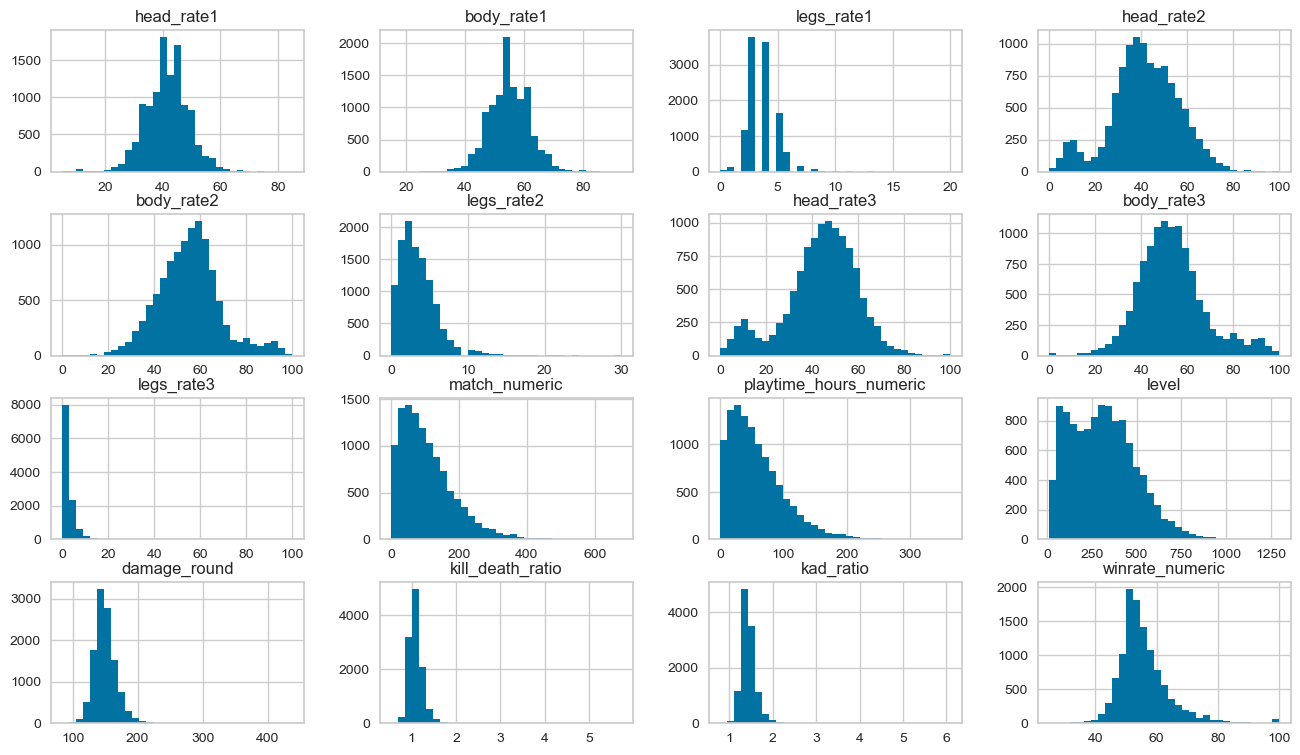

In [8]:
df_vl.hist(bins=33, figsize=(16,9))
plt.show()

Dari histogram fitur numerik di atas, diketahui banyak dari fitur tidak berdistribusi normal. Range atau interval dari masing-masing fitur juga tidak identik sehingga standarisasi lebih cocok daripada normalisasi saat melakukan praprosesing data.

In [9]:
df_vl.loc[df_vl['winrate_numeric']==100]

,rank,weapon_name1,weapon_type1,head_rate1,body_rate1,legs_rate1,weapon_name2,weapon_type2,head_rate2,body_rate2,legs_rate2,weapon_name3,weapon_type3,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric
300,Radiant,Odin,Heavy Weapons,20.0,72.0,7.0,Ghost,Sidearms,48.0,51.0,1.0,Vandal,Assault Rifles,51.0,47.0,3.0,32.0,5.2,45.0,437.9,5.72,6.09,100.0
2889,Immortal 3,Vandal,Assault Rifles,25.0,69.0,6.0,Operator,Sniper Rifles,6.0,94.0,0.0,Ghost,Sidearms,58.0,42.0,0.0,10.0,4.9,272.0,196.9,1.88,2.21,100.0
2958,Immortal 2,Vandal,Assault Rifles,42.0,52.0,6.0,Ghost,Sidearms,52.0,48.0,0.0,Spectre,SMGs,37.0,53.0,10.0,5.0,2.2,169.0,162.6,1.79,2.49,100.0
3259,Immortal 2,Vandal,Assault Rifles,50.0,47.0,3.0,Marshal,Sniper Rifles,38.0,63.0,0.0,Phantom,Assault Rifles,29.0,64.0,7.0,6.0,3.1,110.0,154.9,1.18,1.37,100.0
3795,Immortal 2,Vandal,Assault Rifles,64.0,36.0,0.0,Ghost,Sidearms,53.0,47.0,0.0,Guardian,Assault Rifles,100.0,0.0,0.0,6.0,2.9,142.0,141.5,1.20,1.72,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,Immortal 1,Vandal,Assault Rifles,85.0,15.0,0.0,Phantom,Assault Rifles,33.0,67.0,0.0,Spectre,SMGs,100.0,0.0,0.0,1.0,0.6,420.0,108.5,0.89,1.28,100.0
11110,Immortal 1,Vandal,Assault Rifles,38.0,56.0,6.0,Ghost,Sidearms,59.0,39.0,2.0,Phantom,Assault Rifles,50.0,50.0,0.0,11.0,4.9,271.0,180.0,1.48,1.83,100.0
11128,Immortal 1,Vandal,Assault Rifles,37.0,56.0,7.0,Ghost,Sidearms,67.0,33.0,0.0,Judge,Shotguns,0.0,0.0,0.0,1.0,0.6,211.0,140.3,1.00,1.77,100.0
11163,Immortal 1,Vandal,Assault Rifles,35.0,58.0,8.0,Frenzy,Sidearms,40.0,60.0,0.0,Guardian,Assault Rifles,33.0,67.0,0.0,1.0,0.4,123.0,162.2,1.89,2.33,100.0


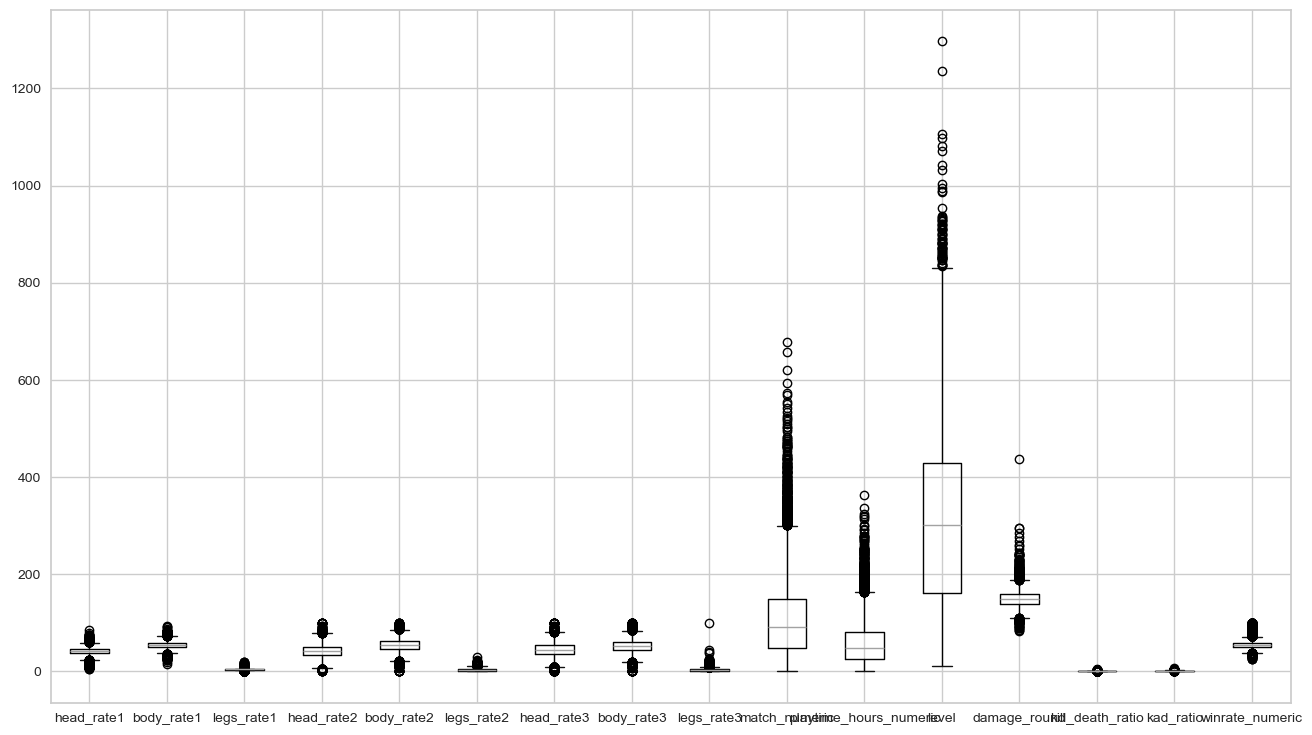

In [10]:
df_vl.boxplot( figsize=(16,9))
plt.show()

Visualisasi boxplot pada data numerik tidak terlihat baik karena perbedaan range nilai. Oleh karena itu, akan dilakukan normalisasi terlebih dahulu.

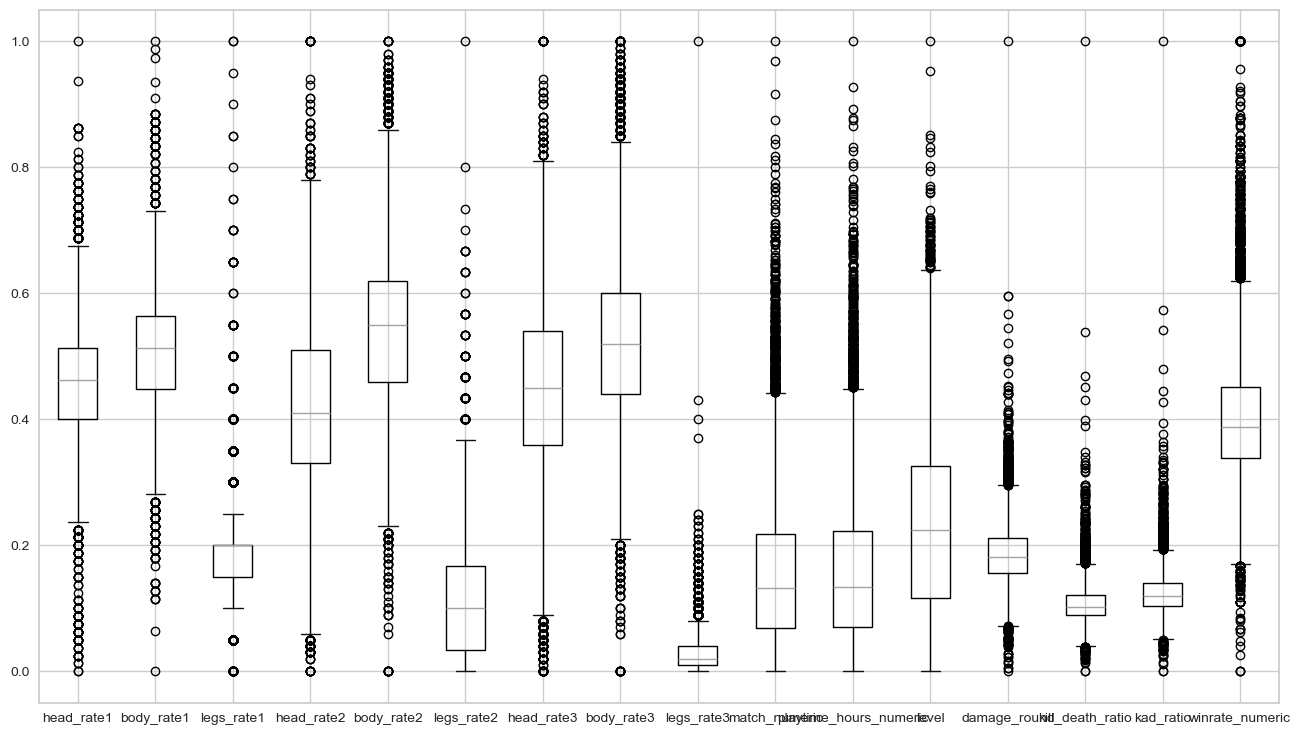

In [11]:
numeric_df_vl_norms = pd.DataFrame()
numeric_df_vl = [x for x in pd.DataFrame(df_vl.dtypes).index if df_vl[x].dtypes == 'float64']

for kolom in numeric_df_vl:
    numeric_df_vl_norms[kolom] = (df_vl[kolom]-min(df_vl[kolom]))/(max(df_vl[kolom])-min(df_vl[kolom]))
numeric_df_vl_norms.boxplot( figsize=(16,9))
plt.show()

In [12]:
df_vl.dtypes[2]

C:\Users\diaz5\AppData\Local\Temp\ipykernel_34588\2197475538.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_vl.dtypes[2]


dtype('O')

Terlihat banyak sekali 'outlier'  pada tiap fitur, akan tetapi player yang dianggap 'outlier' akan di simpan terlebih dahulu. Contoh player yang memiliki winrate di atas 60% menarik untuk diteliti karakteristiknya agar dapat dipelajari.

<Axes: >

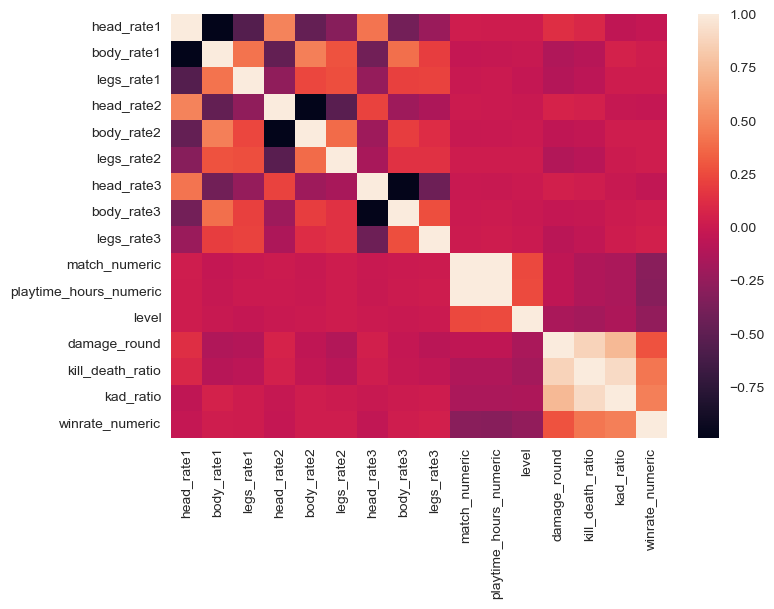

In [13]:
numeric_df_vl = [x for x in pd.DataFrame(df_vl.dtypes).index if df_vl[x].dtypes == 'float64']
#df_vl[numeric_df_vl].corr()
sns.heatmap(df_vl[numeric_df_vl].corr())

Grafik heatmap di atas menunjukan korelasi tiap fitur. Pada bagian akurasi, yaitu: headrate, bodyrate, dan legrate pada tiap weapon 1,2,3 tidak menunjukan adanya korelasi terhadap win rate atau peluang kemenangan. Fitur match, playtime hour, dan level berkorelasi negatif dengan win rate, walaupun nilainya relatif kecil. Terakhir, Fitur yang mempunyai korelasi positif dengan winrate adalah Damage round, KD ratio, dan KADR ratio.

<h2> 4.4 Visualisasi data kategorik

In [14]:
# rank, weapon type123, weapon name,
df_vl_rank_frec = pd.DataFrame(df_vl['rank'].value_counts(ascending=True, normalize = True))
df_vl_weapon_type1_frec = pd.DataFrame(df_vl['weapon_type1'].value_counts(ascending=True, normalize = True))
df_vl_weapon_name1_frec = pd.DataFrame(df_vl['weapon_name1'].value_counts(ascending=True, normalize = True))

df_vl_weapon_type2_frec = pd.DataFrame(df_vl['weapon_type2'].value_counts(ascending=True, normalize = True))
df_vl_weapon_type3_frec = pd.DataFrame(df_vl['weapon_type3'].value_counts(ascending=True, normalize = True))

In [15]:
df_vl_rank_frec

,proportion
rank,
Ascendant 2,0.002128
Ascendant 3,0.031039
Radiant,0.038400
Immortal 3,0.202199
Immortal 2,0.346754
Immortal 1,0.379479


Pada tabel frekuensi relatif, player pada dataset ini didominasi oleh player dengan rank Immortal (~81%), yaitu: 37,9% Immortal 1, 34,6% Immortal 2, dan 20,2% Immortal 3. Player dengan rank tertinggi, yaitu Radiant hanya 3,8% dari total player. Sisanya terdpat Ascendant 2 dan Ascendant 3, yaitu player di bawah rank Immortal yang rasionya sekitar 3,3%. 

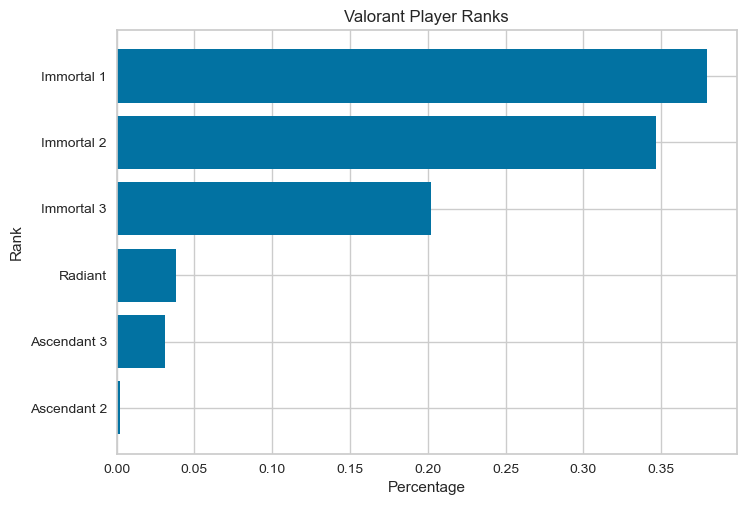

In [16]:
plt.barh(df_vl_rank_frec.index,df_vl_rank_frec.proportion )
plt.ylabel('Rank')
plt.xlabel('Percentage')
plt.title('Valorant Player Ranks')
plt.show()

Visualisasi bar plot dengan jelas membandingkan perbedaan jumlah player pada masing-masing rank. Diketahui bahwa player dengan rank Immortal 1 adalah player terbanyak dan player dengan rank Ascendant 2 adalah player terendah dalam data.

In [17]:
df_vl_weapon_type1_frec

,proportion
weapon_type1,
Sniper Rifles,0.000443
Heavy Weapons,0.001596
Shotguns,0.004878
Assault Rifles,0.993083


Primary weapon adalah weapon yang biasa player gunakan sepanjang match. Player biasa memilih senjata ini saat round kedua dimulai pada saat sebelum dan sesudah pertengahan match. Tabel frekuensi relatif pada fitur primary weapon memperlihatkan bahwa 99,3% menggunakan weapon jenis Assault Riffles. 

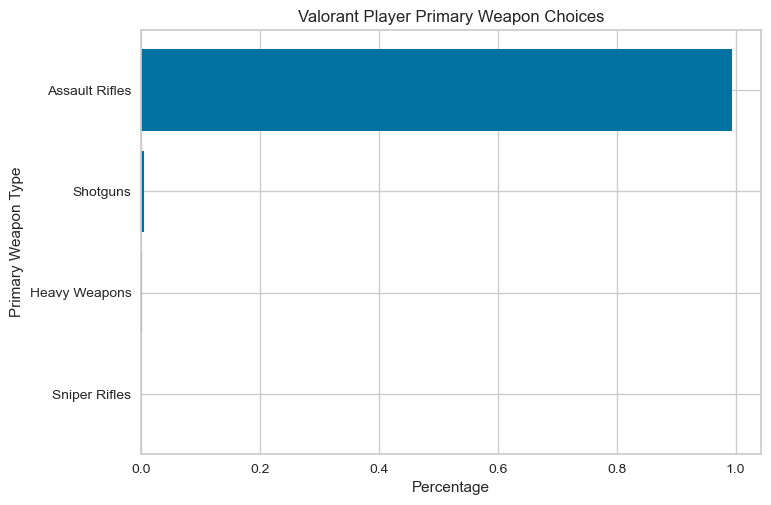

In [18]:
plt.barh(df_vl_weapon_type1_frec.index,df_vl_weapon_type1_frec.proportion )
plt.ylabel('Primary Weapon Type')
plt.xlabel('Percentage')
plt.title('Valorant Player Primary Weapon Choices')
plt.show()

Barplot memperlihatkan bahwa sangat jelas player lebih memilih weapon bertipe Assault Rifle dibandingkan senjata lain sebagai primary weapon.

In [19]:
df_vl_weapon_name1_assault_frec = pd.DataFrame(df_vl.loc[df_vl['weapon_type1']=='Assault Rifles']['weapon_name1'].value_counts(
    ascending=True, normalize = True))*100
df_vl_weapon_name1_assault_frec

,proportion
weapon_name1,
Guardian,0.008930
Bulldog,0.008930
Phantom,1.812824
Vandal,98.169316


Sebanyak 99.3% yang memilih assault rifle sebagai primary weaponnya, sebanyak 98,2% di antaranya memilih Vandal. Senjata terbanyak kedua yang menjadi opsi pemain adalah phantom, sebanyak 1,8%. Vandal memiliki damage yang konsisten pada setiap range jarak sehingga lebih efektif dalam mengeliminasi lawan. Sedangkan phantom, senjata yang mirip dengan vandal memiliki reduksi damage jika jarak tembakan terlalu jauh, sehingga perlu waktu lebih dalam mengeliminasi lawan. Walaupun begitu, phantom memiliki peluru lebih banyak dan tidak menghasilkan bullet tracker dibandingkan Vandal.   

Karena data yang tidak berimbang dan dominan player bermain dengan primary weapon assault rifle, maka dataset akan berfokus pada player bertipe assault rifle.

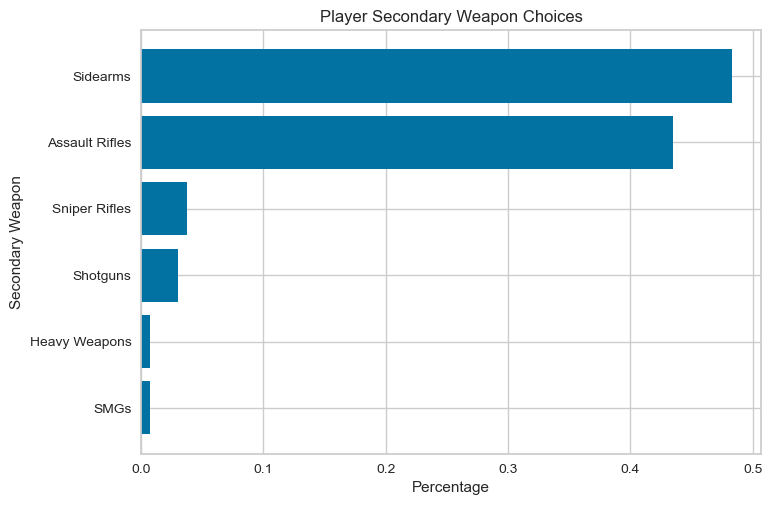

In [20]:
plt.barh(df_vl_weapon_type2_frec.index,df_vl_weapon_type2_frec.proportion )
plt.ylabel('Secondary Weapon')
plt.xlabel('Percentage')
plt.title('Player Secondary Weapon Choices')
plt.show()

Secondary dan Tertiary weapon adalah jenis weapon yang biasa digunakan selain primary weapon. Secondary weapon digunakan untuk menggunakan strategi yang berbeda. Jadi, Secondary dan tertiary weapon dapat menjadi senjata utama kedua dalam permainan. Selain menjadi senjata utama, pemain sering memilih senjata lain untuk menghemat ekonomi permainan untuk round selanjutnya. Pada grafik bar plot dapat diketahui hampir 50% memilih sidearms sebagai secondary weeapon. Sidearms adalah jenis weapon yang memiliki harga relatif murah dibandingkan senjata lainnya sehingga sering digunakan untuk saving. senjata lainnya yang hampir sama banyaknya dengan Sidearms adalah Assault Rifles. 

In [21]:
df_vl_weapon_name2_sidearm_frec = pd.DataFrame(df_vl.loc[df_vl['weapon_type2']=='Sidearms']['weapon_name2'].value_counts(
    ascending=True, normalize = True))*100
df_vl_weapon_name2_sidearm_frec

,proportion
weapon_name2,
Shorty,0.055127
Frenzy,0.055127
Classic,3.289232
Ghost,46.784270
Sheriff,49.816244


Pada tabel frekuensi relatif sidearms, terlihat bahwa Ghost dan Sheriff menjadi senjata paling diminati dalam kategori sidearms. Ghost dan Sheriff memberi damage relatif besar dan efektif pada jarak yang jauh walaupun berada di kategori sidearms. 

In [22]:
df_vl_weapon_name2_assault_frec = pd.DataFrame(df_vl.loc[df_vl['weapon_type2']=='Assault Rifles']['weapon_name2'].value_counts(
    ascending=True, normalize = True))*100
df_vl_weapon_name2_assault_frec

,proportion
weapon_name2,
Bulldog,1.897572
Vandal,4.896960
Guardian,7.345440
Phantom,85.860029


Phantom menjadi senjata secondary paling diminati untuk kategori assault rifle. Phantom menjadi senjata favorit karena lebih efektif bagi player yang memiliki gaya spray dalam menembak. Guardian menjadi senjata secondary kedua yang diminati di kategori assault rifle. Alasannya senjata ini memiliki damage yang sangat besar di kategori assault rifle dan efektif dalam berbagai jarak, akan tetapi tidak bisa melakukan spray layaknya vandal dan phantom. Biasanya player memilih senjata ini jika ekonomi tidak mencukupi untuk membeli Vandal atau Phantom, tetapi tidak memilih untuk saving.

Text(0.5, 1.0, 'Player Teritary Weapon Type Choice')

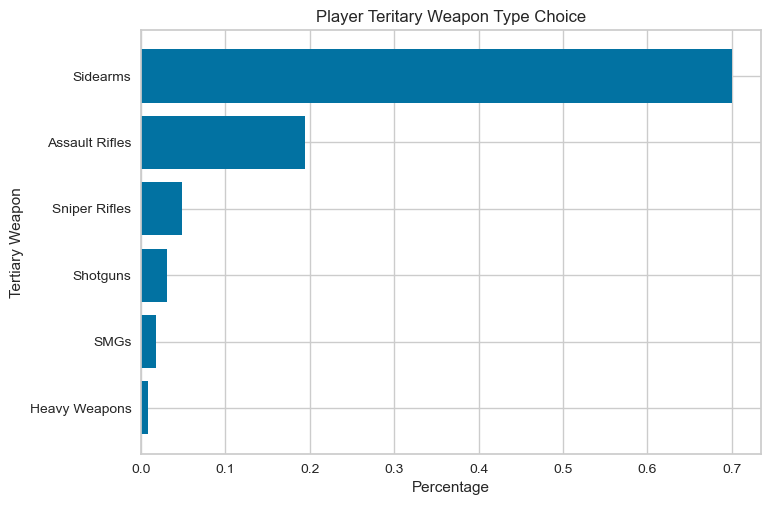

In [23]:

plt.barh(df_vl_weapon_type3_frec.index,df_vl_weapon_type3_frec.proportion )
plt.ylabel('Tertiary Weapon')
plt.xlabel('Percentage')
plt.title('Player Teritary Weapon Type Choice')

In [24]:
df_vl_weapon_name3_sidearm_frec = pd.DataFrame(df_vl.loc[df_vl['weapon_type3']=='Sidearms']['weapon_name3'].value_counts(
    ascending=True, normalize = True))*100
df_vl_weapon_name3_sidearm_frec

,proportion
weapon_name3,
Shorty,0.152091
Frenzy,0.164766
Classic,7.160963
Sheriff,44.233207
Ghost,48.288973


In [25]:
df_vl_weapon_name3_assault_frec = pd.DataFrame(df_vl.loc[df_vl['weapon_type3']=='Assault Rifles']['weapon_name3'].value_counts(
    ascending=True, normalize = True))*100
df_vl_weapon_name3_assault_frec

,proportion
weapon_name3,
Vandal,1.320583
Bulldog,10.018215
Guardian,28.233151
Phantom,60.428051


Pada bagian weapon Tertiary, hasilnya memiliki kemiripan dengan weapon Secondary, akan tetapi lebih banyak player yang memilih sidearms dibandingkan senjata jenis lainnya. Tertiary menjadi kategori paling jarang digunakan player dibandingkan Primary dan Secondary.

In [26]:
df_vl = df_vl.loc[df_vl['weapon_type1']=='Assault Rifles']
df_vl = df_vl.drop(axis=1, columns=['weapon_type1'])
df_vl = df_vl.loc[(df_vl['weapon_type2']=='Assault Rifles') | (df_vl['weapon_type2']=='Sidearms')]
df_vl = df_vl.loc[(df_vl['weapon_type3']=='Assault Rifles') | (df_vl['weapon_type3']=='Sidearms')]

In [27]:
df_vl

,rank,weapon_name1,head_rate1,body_rate1,legs_rate1,weapon_name2,weapon_type2,head_rate2,body_rate2,legs_rate2,weapon_name3,weapon_type3,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric
1,Radiant,Vandal,55.0,41.0,3.0,Ghost,Sidearms,52.0,46.0,2.0,Sheriff,Sidearms,60.0,40.0,0.0,152.0,82.0,549.0,176.5,1.40,1.67,67.1
2,Radiant,Vandal,46.0,50.0,4.0,Sheriff,Sidearms,60.0,38.0,2.0,Ghost,Sidearms,49.0,49.0,2.0,172.0,92.0,760.0,152.5,1.19,1.68,64.5
6,Radiant,Vandal,55.0,43.0,2.0,Ghost,Sidearms,57.0,42.0,1.0,Phantom,Assault Rifles,45.0,52.0,3.0,134.0,71.0,719.0,162.7,1.27,1.61,64.2
7,Radiant,Vandal,37.0,61.0,3.0,Ghost,Sidearms,45.0,55.0,0.0,Sheriff,Sidearms,51.0,49.0,0.0,101.0,57.0,149.0,197.2,1.45,1.75,65.3
9,Radiant,Vandal,42.0,53.0,4.0,Phantom,Assault Rifles,34.0,59.0,6.0,Sheriff,Sidearms,50.0,48.0,2.0,300.0,172.0,446.0,163.2,1.22,1.58,60.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11271,Immortal 2,Vandal,33.0,61.0,5.0,Guardian,Assault Rifles,41.0,55.0,4.0,Ghost,Sidearms,34.0,64.0,2.0,101.0,53.0,209.0,147.3,1.08,1.44,55.4
11272,Immortal 1,Vandal,38.0,56.0,6.0,Guardian,Assault Rifles,31.0,62.0,7.0,Sheriff,Sidearms,73.0,27.0,0.0,16.0,7.8,42.0,127.3,0.77,1.11,62.5
11273,Immortal 1,Vandal,37.0,59.0,4.0,Sheriff,Sidearms,42.0,58.0,0.0,Ghost,Sidearms,42.0,52.0,6.0,37.0,18.0,106.0,145.2,1.06,1.51,62.2
11274,Immortal 1,Vandal,36.0,60.0,4.0,Phantom,Assault Rifles,31.0,63.0,6.0,Sheriff,Sidearms,46.0,54.0,0.0,149.0,85.0,191.0,129.5,0.96,1.43,43.6


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

<h2> 5.1 Menghapus Data Duplikat.

In [28]:
#Type your code here
#Deteksi duplikat

df_vl_duplicate = df_vl.duplicated()
df_vl[df_vl_duplicate]

,rank,weapon_name1,head_rate1,body_rate1,legs_rate1,weapon_name2,weapon_type2,head_rate2,body_rate2,legs_rate2,weapon_name3,weapon_type3,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric
483,Radiant,Vandal,41.0,56.0,2.0,Sheriff,Sidearms,61.0,37.0,1.0,Ghost,Sidearms,48.0,50.0,2.0,112.0,59.0,467.0,141.6,1.01,1.34,45.5
677,Radiant,Vandal,42.0,52.0,7.0,Ghost,Sidearms,49.0,48.0,2.0,Sheriff,Sidearms,59.0,39.0,2.0,146.0,75.0,53.0,184.6,1.31,1.56,75.3
868,Immortal 3,Vandal,47.0,50.0,3.0,Ghost,Sidearms,49.0,51.0,1.0,Guardian,Assault Rifles,46.0,52.0,2.0,103.0,58.0,320.0,141.8,1.09,1.55,61.2
869,Immortal 3,Vandal,48.0,49.0,3.0,Sheriff,Sidearms,53.0,46.0,1.0,Ghost,Sidearms,47.0,53.0,1.0,83.0,46.0,726.0,123.2,0.86,1.18,49.4
870,Immortal 3,Vandal,43.0,52.0,5.0,Ghost,Sidearms,48.0,48.0,4.0,Bulldog,Assault Rifles,39.0,58.0,3.0,108.0,59.0,543.0,133.9,1.00,1.38,44.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10810,Immortal 1,Vandal,34.0,63.0,3.0,Phantom,Assault Rifles,32.0,65.0,2.0,Sheriff,Sidearms,54.0,44.0,2.0,53.0,29.0,211.0,145.6,0.99,1.36,60.4
10811,Immortal 1,Vandal,49.0,47.0,3.0,Sheriff,Sidearms,59.0,41.0,0.0,Ghost,Sidearms,55.0,43.0,2.0,91.0,47.0,187.0,149.3,1.12,1.37,63.7
11248,Ascendant 3,Vandal,41.0,56.0,3.0,Guardian,Assault Rifles,43.0,56.0,1.0,Phantom,Assault Rifles,31.0,64.0,5.0,99.0,52.0,45.0,169.6,1.19,1.52,57.6
11249,Immortal 1,Vandal,54.0,45.0,1.0,Phantom,Assault Rifles,48.0,47.0,5.0,Guardian,Assault Rifles,54.0,42.0,5.0,39.0,20.0,208.0,190.9,1.30,1.60,56.4


In [29]:
df_vl = df_vl.drop_duplicates()
df_vl_duplicate = df_vl.duplicated()
df_vl[df_vl_duplicate]

,rank,weapon_name1,head_rate1,body_rate1,legs_rate1,weapon_name2,weapon_type2,head_rate2,body_rate2,legs_rate2,weapon_name3,weapon_type3,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric


<h2> 5.2 Seleksi, Transformasi dan Modifikasi Outlier

Data juga akan disaring karena beberapa player memberi nilai yang dianggap mustahil. Hal itu bisa bersumber dari penggunaan third party program/ program ilegal atau cheating. Data juga disaring berdasarkan jumlah match yang telah dilakukan player, yaitu 30 match. pembatas ini dilakukan agar data yang diambil lebih representatif menjelaskan karakteristik pemain. 

Kolom nama weapon juga akan dihapus karena dua alasan. Pertama, karakter akurasi identik dengan senjata sejenis dan dapat langsung dikelompokan dalam tipe weapon. Kedua, Data akan memiliki banyak fitur jika melakukan one hot encoding.

Kolom rank akan dikelompokan menjadi lebih kecil. Contoh Immortal 1, Immortal 2, dan Immortal 3 menjadi Immortal. Hasil itu dilakukan dengan asumsi ketiga rank tersebut identik.

Kolom winrate juga akan dibinning menjadi 2 kategori, yaitu increase dan decrease. increase adalah pemain dengan winrate di atas 50% dan decrease adalah pemain dengan winrate di bawah 50%.

Boxplot pada Bagian 4.3 menunjukan bahwa dataset memiliki outlier pada setiap fitur atau kolom. Kali ini outlier tidak akan dihapus, tetapi nilai yang diduga outlier akan diubah dengan batas terdekatnya, baik batas atas atau bawah.

In [30]:
#Player lebih dari 30 matchs
df_vl = df_vl.loc[df_vl['match_numeric']>30]
#akurasi di bawah 100%
for i in ['head','body','legs']:
    for j in range(1,4):
        df_vl = df_vl.loc[df_vl[i+'_rate'+str(j)]<100]
#df_vl weapon name dihapus, kategorik berdasarkan weapon type karena akurasi dalam tipe weapon identik
df_vl = df_vl.drop(axis=1, columns=['weapon_name1','weapon_name2', 'weapon_name3']) 

#winrate <100% (impossible to do)
df_vl = df_vl.loc[df_vl['winrate_numeric']<100]
df_original = df_vl.copy() 

#Group rank
rank = [2 if 'Immortal' in x else  1 if 'Ascendant' in x else 3 for x in df_vl['rank']]
df_vl['rank'] = rank
df_vl

#Make progression column
progression = [1 if x > 50 else 0 for x in df_vl['winrate_numeric']]
df_vl['progression'] = progression

df_original = df_vl.copy() 

df_vl 

,rank,head_rate1,body_rate1,legs_rate1,weapon_type2,head_rate2,body_rate2,legs_rate2,weapon_type3,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression
1,3,55.0,41.0,3.0,Sidearms,52.0,46.0,2.0,Sidearms,60.0,40.0,0.0,152.0,82.0,549.0,176.5,1.40,1.67,67.1,1
2,3,46.0,50.0,4.0,Sidearms,60.0,38.0,2.0,Sidearms,49.0,49.0,2.0,172.0,92.0,760.0,152.5,1.19,1.68,64.5,1
6,3,55.0,43.0,2.0,Sidearms,57.0,42.0,1.0,Assault Rifles,45.0,52.0,3.0,134.0,71.0,719.0,162.7,1.27,1.61,64.2,1
7,3,37.0,61.0,3.0,Sidearms,45.0,55.0,0.0,Sidearms,51.0,49.0,0.0,101.0,57.0,149.0,197.2,1.45,1.75,65.3,1
9,3,42.0,53.0,4.0,Assault Rifles,34.0,59.0,6.0,Sidearms,50.0,48.0,2.0,300.0,172.0,446.0,163.2,1.22,1.58,60.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,2,49.0,47.0,4.0,Sidearms,59.0,39.0,2.0,Assault Rifles,35.0,61.0,4.0,40.0,20.0,275.0,157.5,1.08,1.40,45.0,0
11271,2,33.0,61.0,5.0,Assault Rifles,41.0,55.0,4.0,Sidearms,34.0,64.0,2.0,101.0,53.0,209.0,147.3,1.08,1.44,55.4,1
11273,2,37.0,59.0,4.0,Sidearms,42.0,58.0,0.0,Sidearms,42.0,52.0,6.0,37.0,18.0,106.0,145.2,1.06,1.51,62.2,1
11274,2,36.0,60.0,4.0,Assault Rifles,31.0,63.0,6.0,Sidearms,46.0,54.0,0.0,149.0,85.0,191.0,129.5,0.96,1.43,43.6,0


In [31]:
"""
for kolom in numeric_df_vl:
    q1 = df_vl[kolom].quantile(0.25)
    q3 = df_vl[kolom].quantile(0.75)
    iqr = q3-q1
    df_vl[kolom] = df_vl[kolom].apply(lambda x: (q1 - 1.5*iqr) if x < (q1 - 1.5*iqr) else (q3 + 1.5*iqr) if x > (q3 + 1.5*iqr) else x)
df_vl[numeric_df_vl].boxplot()

"""

'\nfor kolom in numeric_df_vl:\n    q1 = df_vl[kolom].quantile(0.25)\n    q3 = df_vl[kolom].quantile(0.75)\n    iqr = q3-q1\n    df_vl[kolom] = df_vl[kolom].apply(lambda x: (q1 - 1.5*iqr) if x < (q1 - 1.5*iqr) else (q3 + 1.5*iqr) if x > (q3 + 1.5*iqr) else x)\ndf_vl[numeric_df_vl].boxplot()\n\n'

Modifikasi outlier tidak dilakukan karena nilai yang dianggap outlier bukanlah human error dan ingin diteliti.

<h2> 5.3 Encoding dan Normalisasi

One hot encoding akan dilakukan pada tiap tipe weapon. One hot dipilih karena nilai pada fiture weapon type adalah data nominal.

In [32]:
#One Hot Encoding
df_vl_encoded = pd.get_dummies(df_vl, columns=['weapon_type2','weapon_type3'])
df_vl_encoded


,rank,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression,weapon_type2_Assault Rifles,weapon_type2_Sidearms,weapon_type3_Assault Rifles,weapon_type3_Sidearms
1,3,55.0,41.0,3.0,52.0,46.0,2.0,60.0,40.0,0.0,152.0,82.0,549.0,176.5,1.40,1.67,67.1,1,False,True,False,True
2,3,46.0,50.0,4.0,60.0,38.0,2.0,49.0,49.0,2.0,172.0,92.0,760.0,152.5,1.19,1.68,64.5,1,False,True,False,True
6,3,55.0,43.0,2.0,57.0,42.0,1.0,45.0,52.0,3.0,134.0,71.0,719.0,162.7,1.27,1.61,64.2,1,False,True,True,False
7,3,37.0,61.0,3.0,45.0,55.0,0.0,51.0,49.0,0.0,101.0,57.0,149.0,197.2,1.45,1.75,65.3,1,False,True,False,True
9,3,42.0,53.0,4.0,34.0,59.0,6.0,50.0,48.0,2.0,300.0,172.0,446.0,163.2,1.22,1.58,60.7,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,2,49.0,47.0,4.0,59.0,39.0,2.0,35.0,61.0,4.0,40.0,20.0,275.0,157.5,1.08,1.40,45.0,0,False,True,True,False
11271,2,33.0,61.0,5.0,41.0,55.0,4.0,34.0,64.0,2.0,101.0,53.0,209.0,147.3,1.08,1.44,55.4,1,True,False,False,True
11273,2,37.0,59.0,4.0,42.0,58.0,0.0,42.0,52.0,6.0,37.0,18.0,106.0,145.2,1.06,1.51,62.2,1,False,True,False,True
11274,2,36.0,60.0,4.0,31.0,63.0,6.0,46.0,54.0,0.0,149.0,85.0,191.0,129.5,0.96,1.43,43.6,0,True,False,False,True


Fitur numerikal pada dataset akan dinormalisasi agar range nilainya seragam. Pemilihan normalisasi dikarenakan sebagian besar fitur tidak berdistribusi normal. 

In [33]:
df_vl_d = df_vl_encoded.copy()

for kolom in numeric_df_vl:
    df_vl_d[kolom] = (df_vl_d[kolom]-min(df_vl_d[kolom]))/(max(df_vl_d[kolom])-min(df_vl_d[kolom]))  
df_vl_d

,rank,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression,weapon_type2_Assault Rifles,weapon_type2_Sidearms,weapon_type3_Assault Rifles,weapon_type3_Sidearms
1,3,0.688525,0.326923,0.166667,0.527027,0.492537,0.133333,0.589744,0.465753,0.000000,0.187017,0.194842,0.417899,0.538981,0.464286,0.416667,0.589587,1,False,True,False,True
2,3,0.540984,0.500000,0.250000,0.635135,0.373134,0.133333,0.448718,0.589041,0.111111,0.217929,0.223496,0.582101,0.391651,0.339286,0.422222,0.549770,1,False,True,False,True
6,3,0.688525,0.365385,0.083333,0.594595,0.432836,0.066667,0.397436,0.630137,0.166667,0.159196,0.163324,0.550195,0.454266,0.386905,0.383333,0.545176,1,False,True,True,False
7,3,0.393443,0.711538,0.166667,0.432432,0.626866,0.000000,0.474359,0.589041,0.000000,0.108192,0.123209,0.106615,0.666053,0.494048,0.461111,0.562021,1,False,True,False,True
9,3,0.475410,0.557692,0.250000,0.283784,0.686567,0.400000,0.461538,0.575342,0.111111,0.415765,0.452722,0.337743,0.457336,0.357143,0.366667,0.491577,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,2,0.590164,0.442308,0.250000,0.621622,0.388060,0.133333,0.269231,0.753425,0.222222,0.013910,0.017192,0.204669,0.422345,0.273810,0.266667,0.251149,0,False,True,True,False
11271,2,0.327869,0.711538,0.333333,0.378378,0.626866,0.266667,0.256410,0.794521,0.111111,0.108192,0.111748,0.153307,0.359730,0.273810,0.288889,0.410413,1,True,False,False,True
11273,2,0.393443,0.673077,0.250000,0.391892,0.671642,0.000000,0.358974,0.630137,0.333333,0.009274,0.011461,0.073152,0.346839,0.261905,0.327778,0.514548,1,False,True,False,True
11274,2,0.377049,0.692308,0.250000,0.243243,0.746269,0.400000,0.410256,0.657534,0.000000,0.182380,0.203438,0.139300,0.250460,0.202381,0.283333,0.229709,0,True,False,False,True


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [34]:
#Type your code here
kmeans = KMeans(random_state=0)
kmeans.fit(df_vl_d)
db =  DBSCAN()
db.fit(df_vl_d);

print('Banyak cluster pada metode KMeans:', len(set(kmeans.labels_)))
print('Banyak cluster pada metode DBSCANS:', len(set(db.labels_)))

Banyak cluster pada metode KMeans: 8
Banyak cluster pada metode DBSCANS: 23


In [35]:
df_vl_d

,rank,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression,weapon_type2_Assault Rifles,weapon_type2_Sidearms,weapon_type3_Assault Rifles,weapon_type3_Sidearms
1,3,0.688525,0.326923,0.166667,0.527027,0.492537,0.133333,0.589744,0.465753,0.000000,0.187017,0.194842,0.417899,0.538981,0.464286,0.416667,0.589587,1,False,True,False,True
2,3,0.540984,0.500000,0.250000,0.635135,0.373134,0.133333,0.448718,0.589041,0.111111,0.217929,0.223496,0.582101,0.391651,0.339286,0.422222,0.549770,1,False,True,False,True
6,3,0.688525,0.365385,0.083333,0.594595,0.432836,0.066667,0.397436,0.630137,0.166667,0.159196,0.163324,0.550195,0.454266,0.386905,0.383333,0.545176,1,False,True,True,False
7,3,0.393443,0.711538,0.166667,0.432432,0.626866,0.000000,0.474359,0.589041,0.000000,0.108192,0.123209,0.106615,0.666053,0.494048,0.461111,0.562021,1,False,True,False,True
9,3,0.475410,0.557692,0.250000,0.283784,0.686567,0.400000,0.461538,0.575342,0.111111,0.415765,0.452722,0.337743,0.457336,0.357143,0.366667,0.491577,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11270,2,0.590164,0.442308,0.250000,0.621622,0.388060,0.133333,0.269231,0.753425,0.222222,0.013910,0.017192,0.204669,0.422345,0.273810,0.266667,0.251149,0,False,True,True,False
11271,2,0.327869,0.711538,0.333333,0.378378,0.626866,0.266667,0.256410,0.794521,0.111111,0.108192,0.111748,0.153307,0.359730,0.273810,0.288889,0.410413,1,True,False,False,True
11273,2,0.393443,0.673077,0.250000,0.391892,0.671642,0.000000,0.358974,0.630137,0.333333,0.009274,0.011461,0.073152,0.346839,0.261905,0.327778,0.514548,1,False,True,False,True
11274,2,0.377049,0.692308,0.250000,0.243243,0.746269,0.400000,0.410256,0.657534,0.000000,0.182380,0.203438,0.139300,0.250460,0.202381,0.283333,0.229709,0,True,False,False,True


Model Kmeans dan DBSCANS dipilih untuk dibandingkan dan Model dilatih tanpa ditentukan hyperparameternya terlebih dahulu. Kmeans  memberi cluster lebih sedikit dibandingkan Dbscans. Dalam hal ini Kmeans lebih tepat untuk data karena outlier dan data kategorikal sudah diproses pada Data Processing.Kmeans juga memberi cluster lebih sedikit dibandingkan dbscans, sehingga lebih mudah untuk diintepretasikan. Untuk meyakinkan hasil lebih lanjut, maka perlu evaluasi model kmeans dengan metode elbow.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

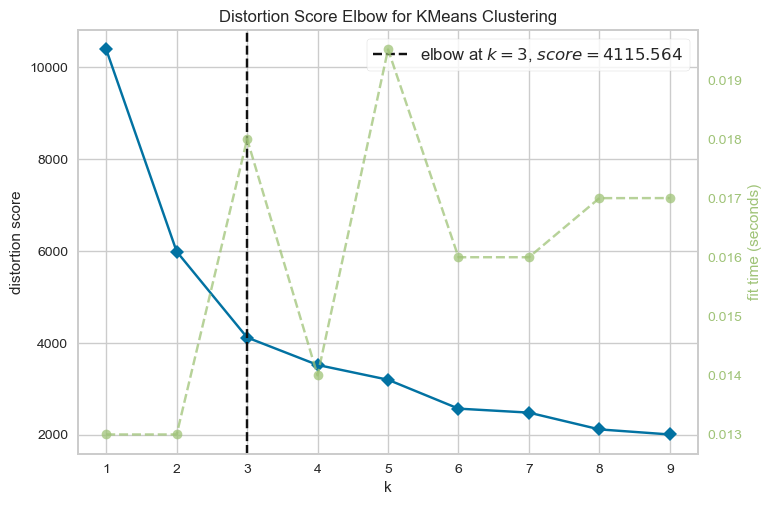

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
#Type your code here
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(df_vl_d)
visualizer.show()

Pada metode Elbow di atas, diketahui bahwa cluster yang optimal adalah sebanyak 3 cluster.

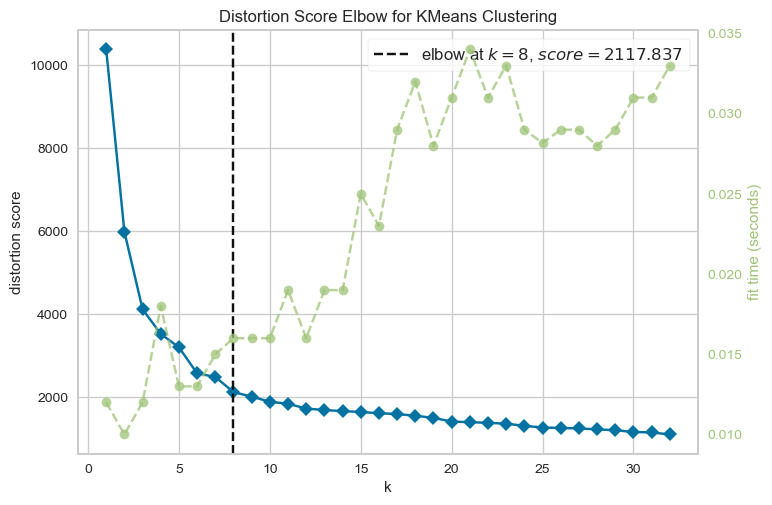

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
#Type your code here
visualizer = KElbowVisualizer(kmeans, k=(1, 33))
visualizer.fit(df_vl_d)
visualizer.show()

In [38]:
kmeans = KMeans(random_state=0,n_clusters=4)
preds = kmeans.fit_predict(df_vl_d)
silhouette_score(df_vl_d, preds)


0.43263767244825635

Akan tetapi, jika dilakukan percobaan dengan variasi jumlah cluster lebih banyak, maka cluster sebanyak 8 cluster adalah jumlah cluster terbaik.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [39]:
print('List ragam atau varian tiap fitur:')
(df_vl[numeric_df_vl].std())**2

List ragam atau varian tiap fitur:


head_rate1                   48.106796
body_rate1                   40.923654
legs_rate1                    1.155570
head_rate2                  134.341430
body_rate2                  106.682372
legs_rate2                    4.107449
head_rate3                  117.983611
body_rate3                   99.949411
legs_rate3                    3.439621
match_numeric              5975.173528
playtime_hours_numeric     1781.890829
level                     32439.510044
damage_round                247.649327
kill_death_ratio              0.019803
kad_ratio                     0.023370
winrate_numeric              42.027976
dtype: float64

Dari fitur di atas, diketahui bahwa fitur kill_death_ratio, kad_ratio, dan leg_rate1 memiliki variance yang kecil atau mendekati 0. Berdasarkan nilai varian, maka fitur tersebut perlu didrop karena tidak memberi informasi pada model.

In [40]:
df_ft_selection = df_vl_d.copy()
df_ft_selection = df_ft_selection.drop(columns = ['legs_rate1','kill_death_ratio','kad_ratio'],axis=1)

<Axes: >

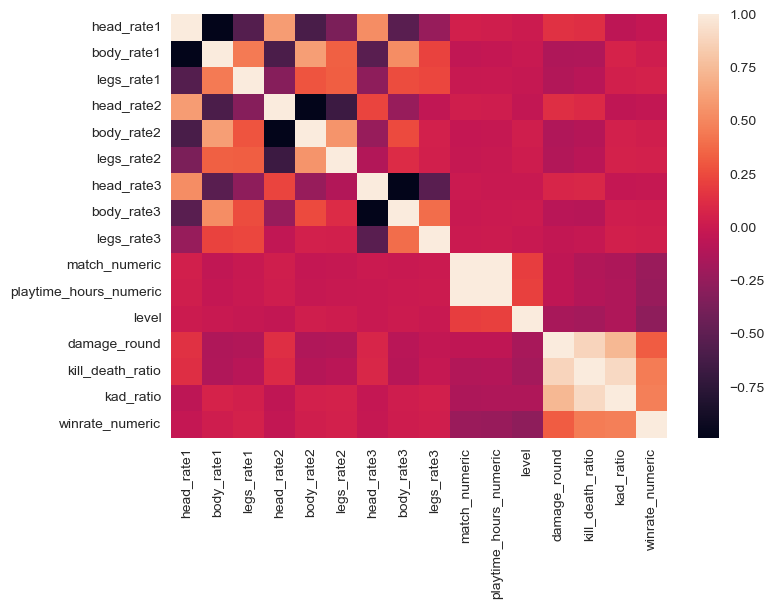

In [41]:
sns.heatmap(df_vl[numeric_df_vl].corr())

- Pada grafik heatmap di atas, fitur headrate cenderung berkorelasi dengan bodyrate dan legrate. Hal ini dikarenakan headrate = 100% - akurasi tengah badan - bawah badan.
- match berkorelasi kuat dengan playtime dan level. hal ini terjadi karena jumlah waktu bermain juga bergantung pada banyaknya permainan. Level juga dipengaruhi oleh banyaknya match. Playtime dan level akan dihapus.

In [42]:
df_ft_selection = df_ft_selection.drop(columns = ['legs_rate2','legs_rate3',
                                                  'body_rate1','body_rate2','body_rate3',
                                                 'playtime_hours_numeric','level'],axis=1)
df_ft_selection

,rank,head_rate1,head_rate2,head_rate3,match_numeric,damage_round,winrate_numeric,progression,weapon_type2_Assault Rifles,weapon_type2_Sidearms,weapon_type3_Assault Rifles,weapon_type3_Sidearms
1,3,0.688525,0.527027,0.589744,0.187017,0.538981,0.589587,1,False,True,False,True
2,3,0.540984,0.635135,0.448718,0.217929,0.391651,0.549770,1,False,True,False,True
6,3,0.688525,0.594595,0.397436,0.159196,0.454266,0.545176,1,False,True,True,False
7,3,0.393443,0.432432,0.474359,0.108192,0.666053,0.562021,1,False,True,False,True
9,3,0.475410,0.283784,0.461538,0.415765,0.457336,0.491577,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
11270,2,0.590164,0.621622,0.269231,0.013910,0.422345,0.251149,0,False,True,True,False
11271,2,0.327869,0.378378,0.256410,0.108192,0.359730,0.410413,1,True,False,False,True
11273,2,0.393443,0.391892,0.358974,0.009274,0.346839,0.514548,1,False,True,False,True
11274,2,0.377049,0.243243,0.410256,0.182380,0.250460,0.229709,0,True,False,False,True


Data ini tidak diperlakukan oversampling, sehingga kategorinya sangat tidak berimbang. Selain kedua metode di atas, fitur aja di sesuaikan menjadi:
- weapon type 2: Assault rifle, Sidearms, atau bukan keduanya. (3 Kategori)
- weapon type 3: Assault rifle, Sidearms, atau bukan keduanya. (3 Kategori)
Secara teknis, varian dari fitur yang memiliki kategori kecil memiliki varian yang mendekati 0. 

In [43]:
"""df_ft_selection = df_ft_selection[['rank', 'head_rate1', 'head_rate2', 'head_rate3', 'match_numeric',
                                   'damage_round' ]]"""

"df_ft_selection = df_ft_selection[['rank', 'head_rate1', 'head_rate2', 'head_rate3', 'match_numeric',\n                                   'damage_round' ]]"

In [44]:
kmeans1 = KMeans(random_state=0)
kmeans1.fit(df_ft_selection)
db1 =  DBSCAN()
db1.fit(df_ft_selection);

print('Banyak cluster pada metode KMeans:', len(set(kmeans1.labels_)))
print('Banyak cluster pada metode DBSCANS:', len(set(db1.labels_)))

Banyak cluster pada metode KMeans: 8
Banyak cluster pada metode DBSCANS: 23


Pemodelan pada kedua model dan kedua data yang belum dan sudah dilakukan feature engineering tidak terlalu berbeda dari banyaknya cluster.  Selanjutnya model kmeans akan dioptimasi. 

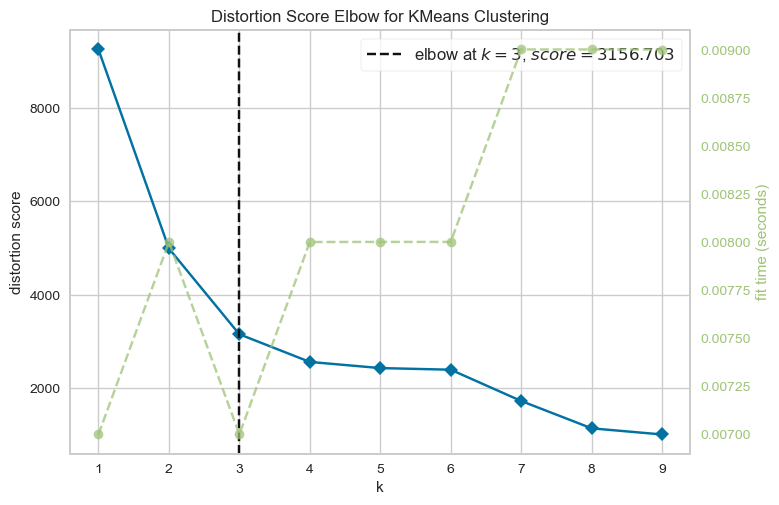

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
visualizer1= KElbowVisualizer(kmeans1, k=(1, 10))
visualizer1.fit(df_ft_selection)
visualizer1.show()

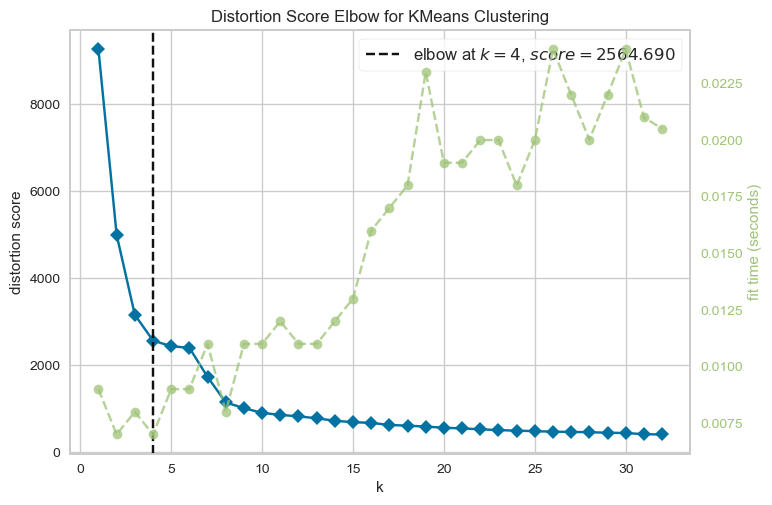

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
visualizer1= KElbowVisualizer(kmeans1, k=(1, 33))
visualizer1.fit(df_ft_selection)
visualizer1.show()

Pada kedua grafik di atas, model dengan kluster berjumlah 8 memberi score lebih baik. Akan tetapi, kluster lebih banyak dan score lebih kecil bukan berarti lebih baik karena bisa saja terjadi overfit. k = 4 setelah feature selection juga cukup memberi score lebih baik (3863,8030) dibandingkan 3 kluster (10575,65) dan 8 kluster (7659,565) sebelum feature selection. Maka dari itu, k = 4 akan dipilih sebagai jumlah kluster terbaik. 

In [47]:
kmeans1 = KMeans(random_state=0,n_clusters=3)
preds = kmeans1.fit_predict(df_ft_selection)
silhouette_score(df_ft_selection, preds)

0.5375400841735011

In [48]:
df_ft_selection.var()

rank                           0.083595
head_rate1                     0.012928
head_rate2                     0.024533
head_rate3                     0.019392
match_numeric                  0.014274
damage_round                   0.009332
winrate_numeric                0.009856
progression                    0.187651
weapon_type2_Assault Rifles    0.249021
weapon_type2_Sidearms          0.249021
weapon_type3_Assault Rifles    0.158580
weapon_type3_Sidearms          0.158580
dtype: float64

Pada tabel varian di atas, damage_round memiliki varian yang rendah. Sebenarnya Winrate juga memiliki winrate yang rendah, akan tetapi fitur tersebut dianggap penting dan ingin dianalisis.

head_rate2 dan head_rate3 akan di drop karena dianggap nilainya mirip dengan head_rate1. Akurasi pemain pada weapon primary tentunya tidak akan berubah jika berganti jenis weapon, apalagi masih dikategori yang sama dan mirip, yaitu assault rifles dan sidearms. 

In [49]:
df_ft_selection = df_ft_selection.drop(axis=1, columns=['damage_round','head_rate2','head_rate3',
                                                       'weapon_type2_Assault Rifles','weapon_type3_Assault Rifles',
                                                        'weapon_type3_Sidearms','weapon_type2_Sidearms'])


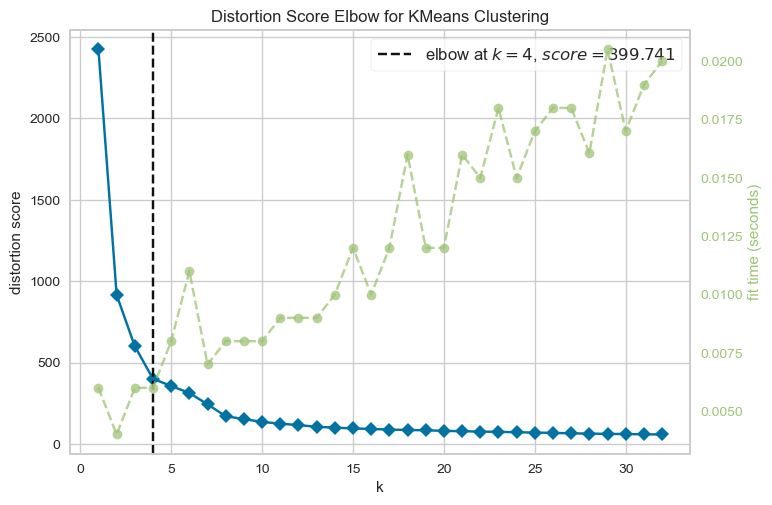

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
visualizer1= KElbowVisualizer(kmeans1, k=(1, 33))
visualizer1.fit(df_ft_selection)
visualizer1.show()

In [51]:
kmeans1 = KMeans(random_state=0,n_clusters=4)
preds = kmeans1.fit_predict(df_ft_selection)
silhouette_score(df_ft_selection, preds)   

0.7541654945089155

In [52]:
df_ft_selection

,rank,head_rate1,match_numeric,winrate_numeric,progression
1,3,0.688525,0.187017,0.589587,1
2,3,0.540984,0.217929,0.549770,1
6,3,0.688525,0.159196,0.545176,1
7,3,0.393443,0.108192,0.562021,1
9,3,0.475410,0.415765,0.491577,1
...,...,...,...,...,...
11270,2,0.590164,0.013910,0.251149,0
11271,2,0.327869,0.108192,0.410413,1
11273,2,0.393443,0.009274,0.514548,1
11274,2,0.377049,0.182380,0.229709,0


In [79]:
kmeans1 = KMeans(random_state=0,n_clusters=4)
kmeans1.fit(df_ft_selection).labels_
label_kmeans = kmeans1.labels_
df_vl['label'] = label_kmeans
df_clustered = df_ft_selection.copy()
df_clustered['label'] = label_kmeans

In [80]:
rank = list(df_vl['rank'])
rank_object = ['Ascendant' if x ==1 else 'Immortal' if x == 2 else 'Radiant' for x in rank]
progress = list(df_vl['progression'])
progression_object = ['Naik' if x == 1 else 0 for x in progress]
df_vl['rank_object'] = rank_object
df_vl['progress_object'] = progression_object

In [81]:
cluster1 = df_vl.loc[df_clustered['label']==0]
cluster2 = df_vl.loc[df_clustered['label']==1]
cluster3 = df_vl.loc[df_clustered['label']==2]
cluster4 = df_vl.loc[df_clustered['label']==3]

In [82]:
centroids = kmeans1.cluster_centers_

#len(df_clustered.columns)

In [83]:
cluster1.describe()

,rank,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression,label
count,290.0,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,290.0
mean,3.0,44.668966,51.813793,3.537931,47.224138,49.896552,2.879310,50.055172,47.641379,2.410345,146.582759,79.527586,431.396552,151.279310,1.113862,1.471828,57.366552,1.0,0.0
std,0.0,5.660591,5.273799,0.933948,10.031513,8.851504,1.823317,9.886399,8.932020,1.839747,80.888374,44.399970,236.889177,12.774737,0.112543,0.120778,5.890067,0.0,0.0
min,3.0,24.000000,33.000000,1.000000,24.000000,23.000000,0.000000,20.000000,17.000000,0.000000,35.000000,19.000000,44.000000,122.500000,0.830000,1.180000,50.100000,1.0,0.0
25%,3.0,41.000000,49.000000,3.000000,40.000000,44.000000,1.250000,44.000000,42.000000,1.000000,87.000000,47.000000,224.500000,141.725000,1.040000,1.390000,52.925000,1.0,0.0
50%,3.0,45.000000,52.000000,3.000000,46.000000,51.000000,3.000000,50.000000,48.000000,2.000000,131.000000,71.000000,434.500000,150.900000,1.100000,1.460000,55.650000,1.0,0.0
75%,3.0,48.000000,55.000000,4.000000,54.000000,57.000000,4.000000,56.750000,53.000000,3.000000,187.500000,100.000000,611.750000,159.700000,1.177500,1.540000,60.500000,1.0,0.0
max,3.0,64.000000,71.000000,7.000000,74.000000,69.000000,8.000000,81.000000,67.000000,14.000000,526.000000,279.000000,1236.000000,197.200000,1.590000,1.980000,83.100000,1.0,0.0


In [84]:
cluster2.describe()

,rank,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression,label
count,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.000000,1856.0,1856.0
mean,2.040948,42.718750,53.656250,3.612069,45.727371,51.316272,2.967672,48.644935,48.925108,2.454203,132.269397,71.915948,375.143319,146.141541,1.041250,1.383254,47.294343,0.0,1.0
std,0.198224,6.556871,6.052541,1.009574,11.102367,9.859043,1.956406,10.545320,9.662627,1.841438,79.191178,43.250483,178.965759,13.074928,0.106821,0.119445,2.735784,0.0,0.0
min,2.000000,20.000000,30.000000,1.000000,19.000000,14.000000,0.000000,14.000000,16.000000,0.000000,31.000000,15.000000,33.000000,106.900000,0.680000,0.920000,28.600000,0.0,1.0
25%,2.000000,38.000000,50.000000,3.000000,37.000000,44.000000,1.000000,42.000000,42.000000,1.000000,72.000000,38.000000,238.750000,137.500000,0.970000,1.310000,46.200000,0.0,1.0
50%,2.000000,43.000000,53.000000,4.000000,45.000000,52.000000,3.000000,49.000000,49.000000,2.000000,116.000000,63.000000,370.500000,144.900000,1.030000,1.370000,48.100000,0.0,1.0
75%,2.000000,47.000000,58.000000,4.000000,54.000000,59.000000,4.000000,56.000000,55.250000,3.000000,175.000000,96.000000,496.000000,153.300000,1.100000,1.440000,49.300000,0.0,1.0
max,3.000000,68.000000,74.000000,9.000000,85.000000,75.000000,11.000000,84.000000,79.000000,18.000000,621.000000,319.000000,1042.000000,223.400000,1.750000,2.180000,50.000000,0.0,1.0


In [85]:
cluster3.describe()

,rank,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression,label
count,5426.0,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.000000,5426.0,5426.0
mean,2.0,41.757095,54.541651,3.696277,44.108736,52.690011,3.192591,47.725765,49.781791,2.514375,117.044047,63.472355,299.921673,151.290638,1.108365,1.462530,56.737081,1.0,2.0
std,0.0,7.075757,6.521755,1.104283,11.790114,10.522993,2.056965,10.985453,10.139339,1.865495,74.791111,40.798230,171.445335,16.542138,0.148691,0.159884,5.650603,0.0,0.0
min,2.0,13.000000,24.000000,1.000000,13.000000,13.000000,0.000000,15.000000,6.000000,0.000000,31.000000,14.000000,12.000000,88.700000,0.620000,0.920000,50.100000,1.0,2.0
25%,2.0,37.000000,50.000000,3.000000,35.000000,46.000000,2.000000,40.000000,43.000000,1.000000,62.000000,33.000000,158.000000,140.500000,1.010000,1.360000,52.700000,1.0,2.0
50%,2.0,42.000000,55.000000,4.000000,43.000000,54.000000,3.000000,47.000000,50.000000,2.000000,98.000000,53.000000,293.000000,149.500000,1.080000,1.440000,55.350000,1.0,2.0
75%,2.0,46.000000,59.000000,4.000000,52.000000,61.000000,4.750000,55.000000,57.000000,3.000000,151.000000,82.000000,414.000000,160.000000,1.170000,1.540000,59.200000,1.0,2.0
max,2.0,74.000000,76.000000,13.000000,87.000000,80.000000,15.000000,92.000000,78.000000,17.000000,678.000000,363.000000,1297.000000,251.600000,2.300000,2.720000,93.900000,1.0,2.0


In [86]:
cluster4.describe()

,rank,head_rate1,body_rate1,legs_rate1,head_rate2,body_rate2,legs_rate2,head_rate3,body_rate3,legs_rate3,match_numeric,playtime_hours_numeric,level,damage_round,kill_death_ratio,kad_ratio,winrate_numeric,progression,label
count,292.0,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.000000,292.0
mean,1.0,40.113014,56.212329,3.726027,41.818493,54.886986,3.328767,45.410959,51.818493,2.767123,158.845890,87.332192,325.068493,146.441438,1.044075,1.393322,51.050342,0.616438,3.0
std,0.0,6.751676,6.176342,1.035590,11.215689,9.970622,2.015778,10.832794,9.871577,1.729236,87.442275,47.726698,172.288185,14.083610,0.116073,0.127835,3.805409,0.487088,0.0
min,1.0,21.000000,35.000000,2.000000,19.000000,22.000000,0.000000,22.000000,20.000000,0.000000,31.000000,16.000000,36.000000,111.500000,0.750000,1.080000,39.000000,0.000000,3.0
25%,1.0,35.000000,52.000000,3.000000,33.000000,48.000000,2.000000,37.000000,45.000000,2.000000,99.000000,53.750000,206.500000,138.075000,0.970000,1.320000,48.600000,0.000000,3.0
50%,1.0,40.000000,56.000000,4.000000,40.000000,56.000000,3.000000,45.500000,52.500000,2.000000,143.000000,78.000000,329.000000,146.100000,1.040000,1.380000,51.250000,1.000000,3.0
75%,1.0,45.000000,60.000000,4.000000,50.000000,63.000000,5.000000,53.000000,59.000000,4.000000,194.250000,109.250000,421.000000,154.675000,1.110000,1.460000,53.500000,1.000000,3.0
max,1.0,63.000000,71.000000,8.000000,77.000000,73.000000,10.000000,80.000000,71.000000,11.000000,657.000000,337.000000,1106.000000,209.400000,1.670000,2.010000,65.900000,1.000000,3.0


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

In [87]:
import plotly.express as px

df = df_ft_selection
features = list(df_ft_selection.columns)

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color= label_kmeans
)

fig.update_traces(diagonal_visible=False)
fig.update_layout(width=750,
    height=750,
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [88]:
"""
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_ft_selection)

plt.scatter(X_pca[:,0],X_pca[:,1], c = label_kmeans, cmap='viridis', alpha=0.6)

plt.title("Cluster Visualization with PCA")
plt.legend()
plt.show()"""

'\npca = PCA(n_components=2)\nX_pca = pca.fit_transform(df_ft_selection)\n\nplt.scatter(X_pca[:,0],X_pca[:,1], c = label_kmeans, cmap=\'viridis\', alpha=0.6)\n\nplt.title("Cluster Visualization with PCA")\nplt.legend()\nplt.show()'

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

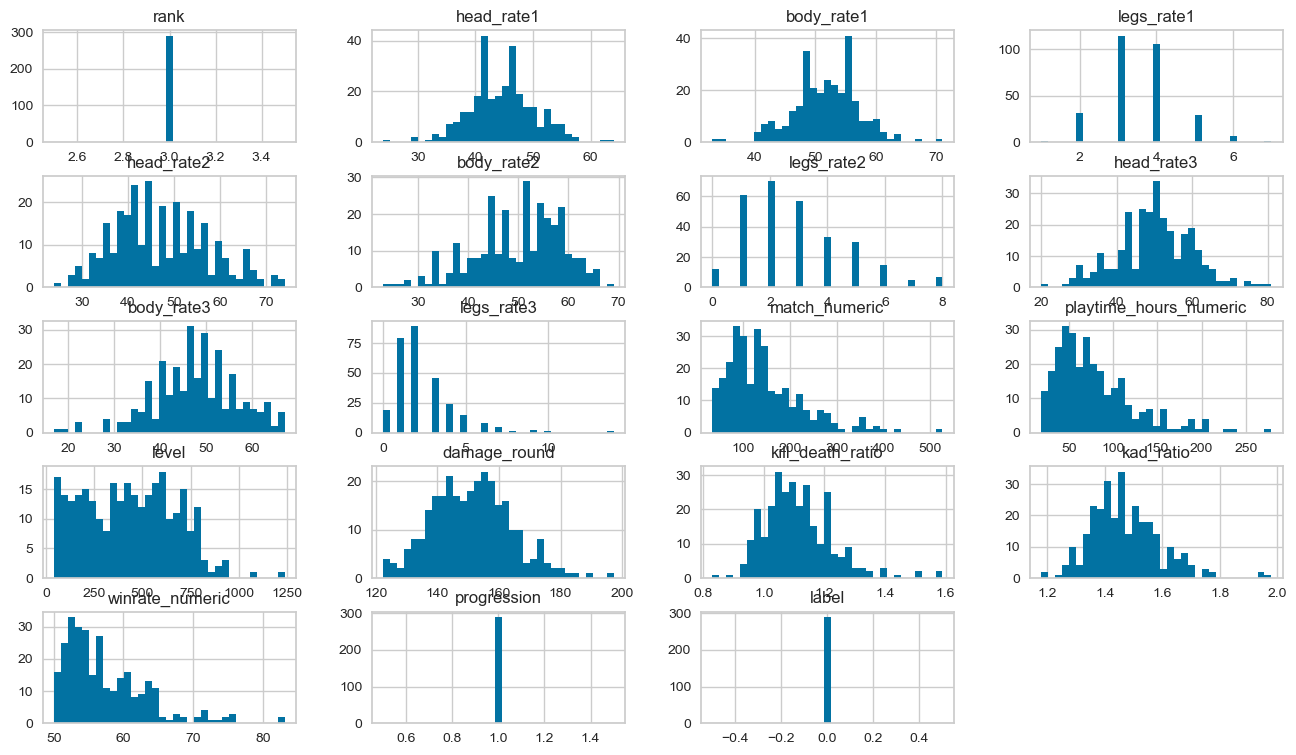

In [89]:
#Type your code here
cluster1.hist(bins=33, figsize=(16,9))
plt.show()

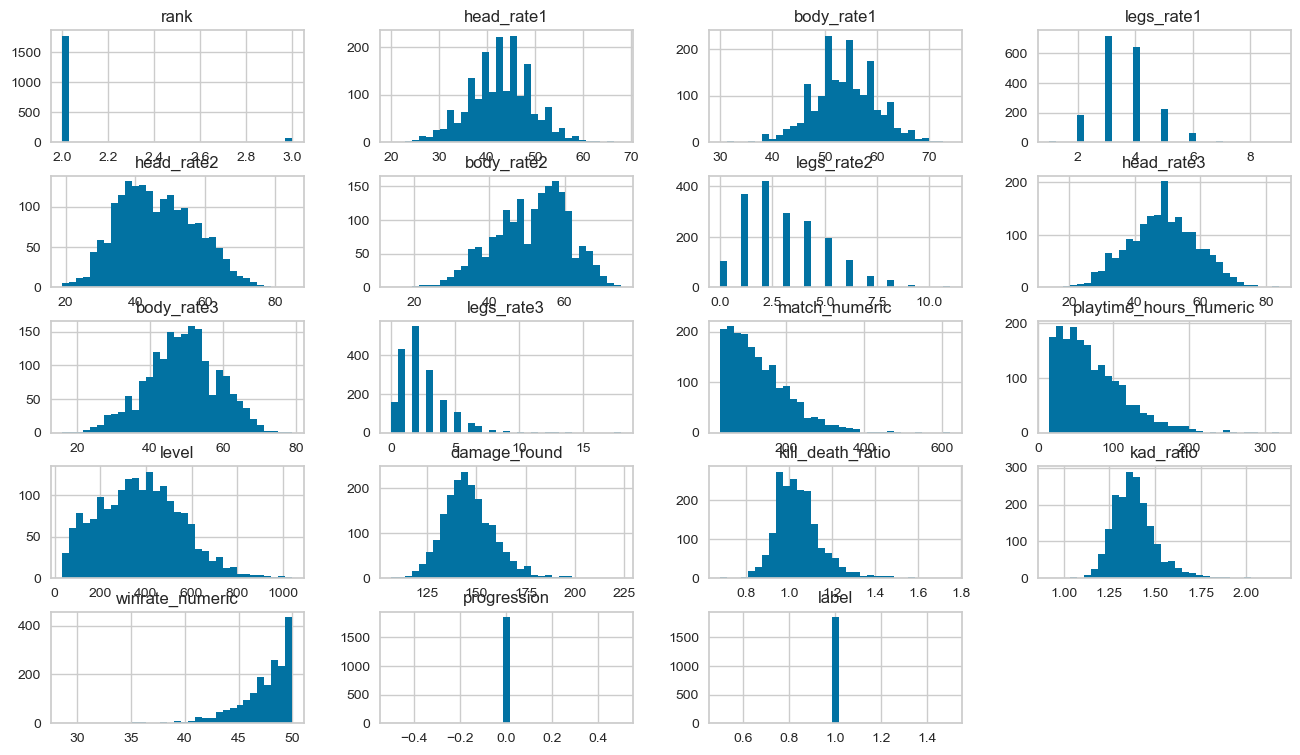

In [90]:
cluster2.hist(bins=33, figsize=(16,9))
plt.show()

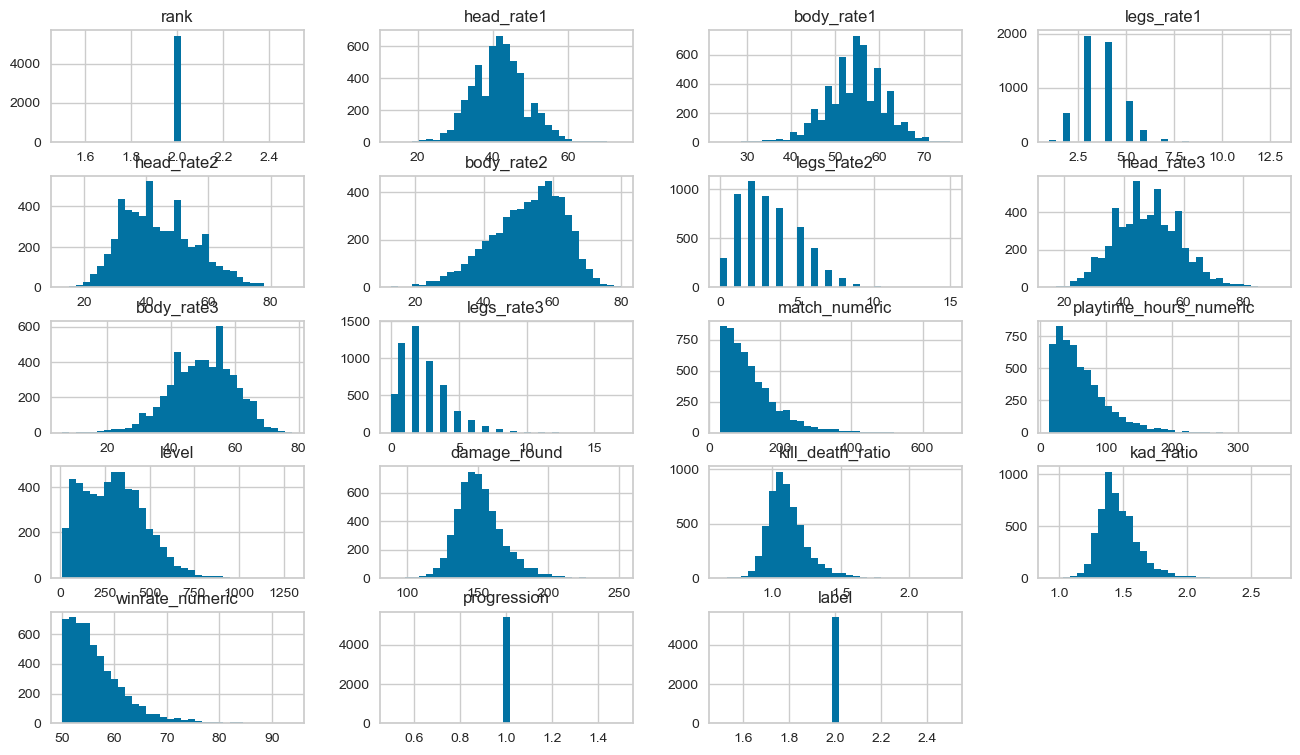

In [91]:
cluster3.hist(bins=33, figsize=(16,9))
plt.show()

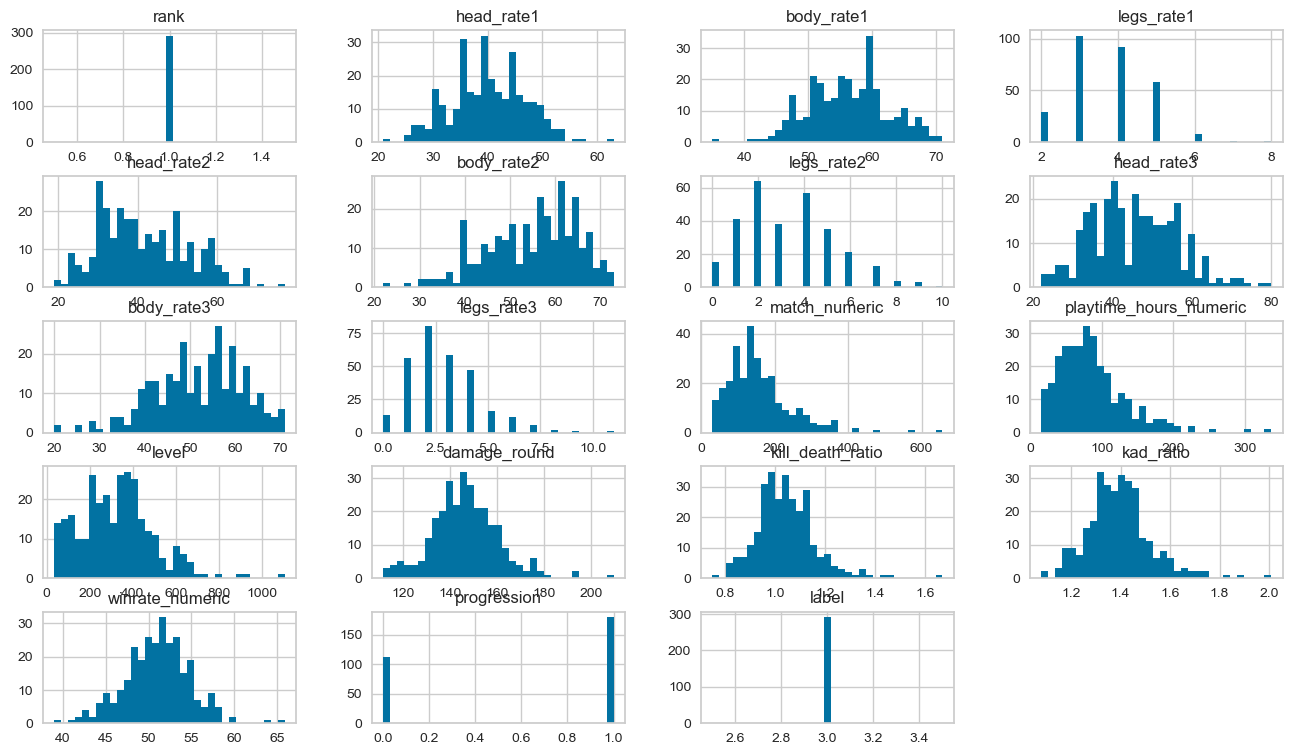

In [92]:
cluster4.hist(bins=33, figsize=(16,9))
plt.show()

In [93]:
print('Rank pemain di cluster 1: \n',pd.DataFrame(cluster1['rank_object'].value_counts()))
print('Rank pemain di cluster 2: \n',pd.DataFrame(cluster2['rank_object'].value_counts()))
print('Rank pemain di cluster 3: \n',pd.DataFrame(cluster3['rank_object'].value_counts()))
print('Rank pemain di cluster 4: \n',pd.DataFrame(cluster4['rank_object'].value_counts()))

Rank pemain di cluster 1: 
              count
rank_object       
Radiant        290
Rank pemain di cluster 2: 
              count
rank_object       
Immortal      1780
Radiant         76
Rank pemain di cluster 3: 
              count
rank_object       
Immortal      5426
Rank pemain di cluster 4: 
              count
rank_object       
Ascendant      292


In [94]:
print('Median waktu main cluster 1: ',(cluster1['playtime_hours_numeric'].median()/60),'jam perhari')
print('Median waktu main cluster 2: ',(cluster2['playtime_hours_numeric'].median()/60),'jam perhari')
print('Median waktu main cluster 3: ',(cluster3['playtime_hours_numeric'].median()/60),'jam perhari')
print('Median waktu main cluster 4: ',(cluster4['playtime_hours_numeric'].median()/60),'jam perhari')

Median waktu main cluster 1:  1.1833333333333333 jam perhari
Median waktu main cluster 2:  1.05 jam perhari
Median waktu main cluster 3:  0.8833333333333333 jam perhari
Median waktu main cluster 4:  1.3 jam perhari


In [95]:
print('Median match cluster 1: ',(cluster1['match_numeric'].median()),' match')
print('Median match cluster 2: ',(cluster2['match_numeric'].median()),' match')
print('Median match cluster 3: ',(cluster3['match_numeric'].median()),' match')
print('Median match cluster 4: ',(cluster4['match_numeric'].median()),' match')

Median match cluster 1:  131.0  match
Median match cluster 2:  116.0  match
Median match cluster 3:  98.0  match
Median match cluster 4:  143.0  match


In [96]:
print('Median match cluster 1: ',((cluster1['match_numeric'].median())/60),' match perhari')
print('Median match cluster 2: ',((cluster2['match_numeric'].median())/60),' match perhari')
print('Median match cluster 3: ',((cluster3['match_numeric'].median())/60),' match perhari')
print('Median match cluster 4: ',((cluster4['match_numeric'].median())/60),' match perhari')

Median match cluster 1:  2.183333333333333  match perhari
Median match cluster 2:  1.9333333333333333  match perhari
Median match cluster 3:  1.6333333333333333  match perhari
Median match cluster 4:  2.3833333333333333  match perhari


In [97]:
print('Median win rate cluster 1: ',(cluster1['winrate_numeric'].median()))
print('Median win rate cluster 2: ',(cluster2['winrate_numeric'].median()))
print('Median win rate cluster 3: ',(cluster3['winrate_numeric'].median()))
print('Median win rate cluster 4: ',(cluster4['winrate_numeric'].median()))

Median win rate cluster 1:  55.650000000000006
Median win rate cluster 2:  48.1
Median win rate cluster 3:  55.349999999999994
Median win rate cluster 4:  51.25


In [98]:
print('Interval kuartil winrate cluster 1: ',(cluster1['winrate_numeric'].quantile(0.75)-cluster1['winrate_numeric'].quantile(0.25)))
print('Interval kuartil winrate cluster 2: ',(cluster2['winrate_numeric'].quantile(0.75)-cluster2['winrate_numeric'].quantile(0.25)))
print('Interval kuartil winrate cluster 3: ',(cluster3['winrate_numeric'].quantile(0.75)-cluster3['winrate_numeric'].quantile(0.25)))
print('Interval kuartil winrate cluster 4: ',(cluster4['winrate_numeric'].quantile(0.75)-cluster4['winrate_numeric'].quantile(0.25)))

Interval kuartil winrate cluster 1:  7.575000000000003
Interval kuartil winrate cluster 2:  3.0999999999999943
Interval kuartil winrate cluster 3:  6.5
Interval kuartil winrate cluster 4:  4.899999999999999


In [99]:
print('Median head rate cluster 1: ',(cluster1['head_rate1'].median()))
print('Median head rate cluster 2: ',(cluster2['head_rate1'].median()))
print('Median head rate cluster 3: ',(cluster3['head_rate1'].median()))
print('Median head rate cluster 4: ',(cluster4['head_rate1'].median()))

Median head rate cluster 1:  45.0
Median head rate cluster 2:  43.0
Median head rate cluster 3:  42.0
Median head rate cluster 4:  40.0


In [100]:
print('Interval kuartil headshot rate cluster 1: ',(cluster1['head_rate1'].quantile(0.75) - cluster1['head_rate1'].quantile(0.25)))
print('Interval kuartil headshot rate cluster 2: ',(cluster2['head_rate1'].quantile(0.75) - cluster2['head_rate1'].quantile(0.25)))
print('Interval kuartil headshot rate cluster 3: ',(cluster3['head_rate1'].quantile(0.75) - cluster3['head_rate1'].quantile(0.25)))
print('Interval kuartil headshot rate cluster 4: ',(cluster4['head_rate1'].quantile(0.75) - cluster4['head_rate1'].quantile(0.25)))

Interval kuartil headshot rate cluster 1:  7.0
Interval kuartil headshot rate cluster 2:  9.0
Interval kuartil headshot rate cluster 3:  9.0
Interval kuartil headshot rate cluster 4:  10.0


In [101]:
print(cluster1['weapon_type2'].value_counts(normalize=True)*100)
print(cluster2['weapon_type2'].value_counts(normalize=True)*100)
print(cluster3['weapon_type2'].value_counts(normalize=True)*100)
print(cluster4['weapon_type2'].value_counts(normalize=True)*100)

weapon_type2
Sidearms          59.310345
Assault Rifles    40.689655
Name: proportion, dtype: float64
weapon_type2
Sidearms          56.896552
Assault Rifles    43.103448
Name: proportion, dtype: float64
weapon_type2
Sidearms          51.935127
Assault Rifles    48.064873
Name: proportion, dtype: float64
weapon_type2
Assault Rifles    53.424658
Sidearms          46.575342
Name: proportion, dtype: float64


In [102]:
print(cluster1['weapon_type3'].value_counts(normalize=True)*100)
print(cluster2['weapon_type3'].value_counts(normalize=True)*100)
print(cluster3['weapon_type3'].value_counts(normalize=True)*100)
print(cluster4['weapon_type3'].value_counts(normalize=True)*100)

weapon_type3
Sidearms          80.344828
Assault Rifles    19.655172
Name: proportion, dtype: float64
weapon_type3
Sidearms          81.411638
Assault Rifles    18.588362
Name: proportion, dtype: float64
weapon_type3
Sidearms          80.058975
Assault Rifles    19.941025
Name: proportion, dtype: float64
weapon_type3
Sidearms          76.027397
Assault Rifles    23.972603
Name: proportion, dtype: float64


In [103]:
print(cluster1['progress_object'].value_counts(normalize=True)*100)
print(cluster2['progress_object'].value_counts(normalize=True)*100)
print(cluster3['progress_object'].value_counts(normalize=True)*100)
print(cluster4['progress_object'].value_counts(normalize=True)*100)

progress_object
Naik    100.0
Name: proportion, dtype: float64
progress_object
0    100.0
Name: proportion, dtype: float64
progress_object
Naik    100.0
Name: proportion, dtype: float64
progress_object
Naik    61.643836
0       38.356164
Name: proportion, dtype: float64


Tulis hasil interpretasinya di sini.
1. Cluster 1:
   - Cluster 1 adalah cluster pemain dengan rank Radiant, rank tertinggi di Valorant.
   - Median waktu bermain di rank ini adalah 1,18 Jam perhari dengan 2-3 Match perhari dalam periode 60 hari.
   - Pemain di cluster ini memiliki median ratio kemenangan sebesar 55,65% dengan interval kuatil sebesar 7,58%.
   - Akurasi headshot pada pemain ini berkisar 45% dengan interval kuartil 7%.
   - Pemain di cluster ini cenderung memilih sidearms (59,3%) sebagai secondary weapon dibandingkan assault rifles (40,68%).
   - Pemain cluster ini punya progression yang baik (100% winrate di atas 50%).
2. Cluster 2:
   - Cluster 2 adalah cluster pemain dengan rank Immortal yang merupakan rank tertinggi kedua di Valorant dan Radiant.
   - Median waktu bermain di rank ini adalah 1,05 Jam perhari dengan 1-2 Match perhari dalam periode 60 hari.
   - Pemain di cluster ini memiliki median ratio kemenangan sebesar 48,1% dengan interval kuatil sebesar 3,1%.
   - Akurasi headshot pada pemain ini berkisar 43% dengan interval kuartil 9%.
   - Walaupun pemain di cluster ini cenderung memilih sidearms (56,43%) sebagai seondary weapon, proporsinya hampir berimbang dengan assault rifles (43.10%).
   - Pemain cluster ini punya progression yang baik (100% winrate di atas 50%).
3. Cluster 3:
   - Cluster 3 adalah cluster pemain dengan rank Immortal, rank tertinggi kedua di Valorant. Cluster 3 mirip dengan cluster 2.
   - Median waktu bermain di rank ini adalah 0,8 Jam perhari dengan 1-2 Match perhari dalam periode 60 hari. Cluster 3 memiliki waktu main lebih banyak dibandingkan cluster 2.
   - Pemain di cluster ini memiliki median ratio kemenangan sebesar 55,35% dengan interval kuatil sebesar 6,5%. Ratio kemenangan cluster 3 lebih tinggi dibandingkan cluster 2, tetapi memiliki sebaran nilai yang lebih besar dilihat dari besaran interval kuartil.
   - Akurasi headshot pada pemain ini berkisar 42% dengan interval kuartil 9%
   - Pemain di cluster ini cenderung memilih sidearms (51,93%) sebagai secondary weapon dibandingkan assault rifles (48,06%).
   - Pemain cluster ini punya progression yang baik (100% winrate di atas 50%).
4. Cluster 4:
   - Cluster 4 adalah cluster pemain dengan rank Ascendant, rank tertinggi ketiga di Valorant.
   - Median waktu bermain di rank ini adalah 1,3 jam perhari dengan 2-3 Match perhari dalam periode 60 hari.
   - Pemain di cluster ini memiliki median ratio kemenangan sebesar 51,25% dengan interval kuartil sebesar 4,9%.
   - Akurasi headshot pada pemain ini berkisar 40% dengan interval kuartil 10%.
   - Berbeda dengan cluster lainnya, pemain di cluster 4 lebih memilih Assault Rifle sebagai scondary weapon (53,42%) dibandingkan sidearms (46,57%)
   - Hanya 61,6% pemain di cluster ini memiliki progres kenaikan rank yang baik dan 38,36% di antaranya menurun.
   - Cluster ini sangat cocok di jadikan target pemasaran training atau coaching dibandingkan cluster lainnya. Pemain ini memiliki headshot rate terendah dibandingkan cluster lainnya dan progression lebih bervariasi.

Walaupun model ini memberi hasil yang baik (silhouette score = 0.75), hasil model ini kurang memuaskan. Alasannya adalah banyak fitur yang dipangkas demi mengoptimalkan pemodelan. Penyebab utamanya adalah kurangnya varian pada kebanyakan fitur. Hal ini dikarenakan dataset terdiri dari player high rank saja, sehingga datanya tidak terlalu bervariasi dan model tidak bisa menggolongkan atau membuat segmentasi data dengan baik. Maka dari itu, disarankan untuk menambah data dari rank menengah dan bawah dengan tantangan data tersebut tidak memiliki leaderboard dan hanya bisa diminta secara individu. 

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [105]:
df_clustered.to_csv('df_selecetion_clustered.csv')
df_vl.to_csv('df_vl_clustered.csv')